In [ ]:
import pandas as pd
import networkx as nx

file_path1 = "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/"

graph_10 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_10.csv", sep = '\t')
graph_20 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_20.csv", sep = '\t')
graph_30 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_30.csv", sep = '\t')
graph_40 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_40.csv", sep = '\t')
graph_50 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_50.csv", sep = '\t')
graph_60 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_60.csv", sep = '\t')
graph_70 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_70.csv", sep = '\t')
graph_80 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_80.csv", sep = '\t')
graph_90 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross_90.csv", sep = '\t')
graph_100 = pd.read_csv(file_path1 + "sorted_by_ig1030_time_cross.csv", sep = '\t')
# graph_tcga = pd.read_csv("/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcga/output/sorted_by_ig2.csv", sep = '\t')

In [ ]:
# print(graph_100_shuffled_reaction)

          ig_0      ig_1          start            end
0     1.000000  1.000000  R-MMU-2993780  R-MMU-2993780
1     0.418641  0.534448  R-MMU-8948224  R-MMU-1981128
2     0.320046  0.432304  R-MMU-2990833  R-MMU-2993780
3     0.285316  0.367997  R-MMU-8948222  R-MMU-1981128
4     0.277146  0.344043   R-MMU-114259   R-MMU-114252
...        ...       ...            ...            ...
8551  0.001155  0.000004  R-MMU-5218850  R-MMU-2029465
8552  0.001471  0.000002  R-MMU-2162019  R-MMU-2161768
8553  0.002003  0.000002   R-MMU-114261   R-MMU-201634
8554  0.002003  0.000002   R-MMU-114261   R-MMU-201634
8555  0.000314  0.000001   R-MMU-451309   R-MMU-451310

[8556 rows x 4 columns]


In [ ]:
# mask = graph_tcga['start'] == "R-MMU-2993780"
# matching_rows = graph_tcga[mask]

# if not matching_rows.empty:
#     print("Found at row(s):")
#     print(matching_rows.index)
#     print("\nFull row data:")
#     print(matching_rows)
# else:
#     print("Not found in 'start' column")

# if mask.any():
#     first_match_index = mask.idxmax()
#     print(f"\nFirst occurrence at row: {first_match_index}")

Found at row(s):
Index([ 168, 2231, 3862, 3912, 3944, 3949, 3950, 3955, 3956, 3966,
       ...
       5769, 5786, 5787, 5788, 6055, 6236, 6306, 6686, 6741, 6860],
      dtype='int64', length=112)

Full row data:
          ig_0      ig_1      ig_2      ig_3      ig_4      ig_5      ig_6  \
168   0.366525  0.254741  0.213433  0.241210  0.105961  0.692471  0.480035   
2231  0.240288  0.106385  0.000794  0.116215  0.026031  0.152363  0.145414   
3862  0.005870  0.014588  0.003347  0.013399  0.015824  0.013289  0.021532   
3912  0.006444  0.014479  0.001836  0.014290  0.015570  0.011540  0.022068   
3944  0.009131  0.014467  0.000465  0.012902  0.015474  0.010328  0.022281   
...        ...       ...       ...       ...       ...       ...       ...   
6236  0.004271  0.003076  0.000820  0.009975  0.007149  0.003575  0.007070   
6306  0.008817  0.000131  0.002394  0.004780  0.006931  0.008411  0.004612   
6686  0.009603  0.002565  0.004205  0.002637  0.005752  0.006382  0.000288   
6741  0.

In [14]:
print(graph_10)

          ig_0          ig_1          start            end
0     0.436999  1.000000e+00  R-MMU-8956140  R-MMU-8956184
1     0.789761  3.993672e-01  R-MMU-5686685  R-MMU-5693599
2     1.000000  3.441545e-01  R-MMU-1981128  R-MMU-8948222
3     0.688710  2.668262e-01  R-MMU-5683801  R-MMU-5686685
4     0.590685  2.266756e-01  R-MMU-6799332  R-MMU-6805285
...        ...           ...            ...            ...
8551  0.000899  5.198565e-06   R-MMU-166041  R-MMU-2201293
8552  0.000650  3.208904e-06  R-MMU-5671749  R-MMU-5671763
8553  0.009221  1.401100e-06  R-MMU-8987129  R-MMU-8987097
8554  0.004689  1.265735e-06  R-MMU-9034714  R-MMU-9603419
8555  0.021259  5.832714e-07   R-MMU-879910   R-MMU-879930

[8556 rows x 4 columns]


In [ ]:
import pandas as pd
import networkx as nx

def analyze_and_save_graph(graph_data, graph_name, output_folder):
    top_1_percent = lambda df: df.head(max(1, len(df)//100))
    top_100 = lambda df: df.head(100)

    def top_25_percent_sum(df):
        total_sum = df["ig_1"].sum()
        threshold = total_sum * 0.25
        df["ig_1"] = df["ig_1"].cumsum()
        return df[df["ig_1"] <= threshold]

    def get_top(df, percentage):
        if percentage == 0.01:
            return top_1_percent(df)
        elif percentage == 0.25:
            return top_25_percent_sum(df)
        elif percentage == 1.00:
            return top_100(df)

    def calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type):
        if centrality_type == 'Eigenvector':
            centrality = nx.eigenvector_centrality(G, max_iter=1000)
        elif centrality_type == 'Betweenness':
            centrality = nx.betweenness_centrality(G)
        elif centrality_type == 'Closeness':
            centrality = nx.closeness_centrality(G)
        
        df_centrality = pd.DataFrame({
            'Node': G.nodes(),
            centrality_type: [centrality[node] for node in G.nodes()]
        })

        df_centrality.to_csv(f"{output_folder}/{graph_name}_{mode}_{centrality_type}.csv", index=False)

    for mode, percentage in [('Top_1%', 0.01), ('Top_25%', 0.25), ('Top_100', 1.00)]:
        filtered_data = get_top(graph_data, percentage)
        G = nx.from_pandas_edgelist(filtered_data, 'start', 'end', create_using=nx.DiGraph())

        for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
            calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type)

graphs = [graph_10, graph_20, graph_30, graph_40, graph_50, graph_60, graph_70, graph_80, graph_90, graph_100]
graph_names = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
output_folder = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'

for graph, name in zip(graphs, graph_names):
    print(f'Analyzing and saving {name}')
    analyze_and_save_graph(graph, name, output_folder)


Analyzing and saving graph_10
Analyzing and saving graph_20
Analyzing and saving graph_30
Analyzing and saving graph_40
Analyzing and saving graph_50
Analyzing and saving graph_60
Analyzing and saving graph_70
Analyzing and saving graph_80
Analyzing and saving graph_90
Analyzing and saving graph_100


In [7]:
import pandas as pd
import os
import re

def load_and_sort(folder_path, dataset_prefix, centrality_type, mode):
    pattern = re.compile(rf"^{dataset_prefix}_{mode}_{centrality_type}\.csv$")

    for filename in os.listdir(folder_path):
        if pattern.match(filename):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            print('\n')
            print(f"The size of current dataframe: {len(df)}")
            return df.sort_values(by=centrality_type, ascending=False).head(10)

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'

dataset_prefixes = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
modes = ['Top_1%', 'Top_25%', 'Top_100']

for dataset_prefix in dataset_prefixes:
    print(f"Results for {dataset_prefix}:")
    for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
        print(f"\nResults for {centrality_type}:")
        for mode in modes:
            result = load_and_sort(folder_path, dataset_prefix, centrality_type, mode)
            print(f"\nTop 10 Nodes by {mode} {centrality_type} for {dataset_prefix}:")
            print(result)
        print("\n" + "-"*50 + "\n")


Results for graph_10:

Results for Eigenvector:


The size of current dataframe: 108

Top 10 Nodes by Top_1% Eigenvector for graph_10:
              Node  Eigenvector
19   R-MMU-1981157     0.723607
4    R-MMU-1981128     0.447214
18   R-MMU-8948224     0.447214
5    R-MMU-8948222     0.276393
93    R-MMU-353125     0.000022
52   R-MMU-5668481     0.000022
100    R-MMU-69600     0.000022
1    R-MMU-8956184     0.000006
97     R-MMU-69685     0.000002
0    R-MMU-8956140     0.000001


The size of current dataframe: 379

Top 10 Nodes by Top_25% Eigenvector for graph_10:
              Node  Eigenvector
19   R-MMU-1981157     0.622115
4    R-MMU-1981128     0.384555
34   R-MMU-2993780     0.384555
18   R-MMU-8948224     0.384447
25   R-MMU-2990833     0.237668
5    R-MMU-8948222     0.237668
336  R-MMU-8944247     0.237560
135  R-MMU-9840884     0.000108
16   R-MMU-1981104     0.000108
123  R-MMU-1605717     0.000108


The size of current dataframe: 129

Top 10 Nodes by Top_100 Eigenvector



The size of current dataframe: 109

Top 10 Nodes by Top_100 Closeness for graph_70:
             Node  Closeness
12   R-MMU-398040   0.062500
13   R-MMU-398193   0.042088
6     R-MMU-75873   0.038580
45   R-MMU-392295   0.037037
31   R-MMU-176116   0.037037
60  R-MMU-6805285   0.034858
98   R-MMU-139941   0.033951
41  R-MMU-2316429   0.030000
15  R-MMU-1981128   0.029630
0   R-MMU-1981157   0.029630

--------------------------------------------------

Results for graph_80:

Results for Eigenvector:


The size of current dataframe: 104

Top 10 Nodes by Top_1% Eigenvector for graph_80:
             Node   Eigenvector
0   R-MMU-2993780  8.506505e-01
1   R-MMU-2990833  5.257309e-01
10  R-MMU-1981157  6.452940e-04
11  R-MMU-8948224  4.403020e-04
29  R-MMU-1981128  3.004303e-04
30  R-MMU-8948222  2.049920e-04
26  R-MMU-8948232  4.157565e-15
25  R-MMU-1981104  4.157565e-15
49  R-MMU-6799246  5.075222e-46
87    R-MMU-69685  4.732712e-46


The size of current dataframe: 252

Top 10 Nodes by T

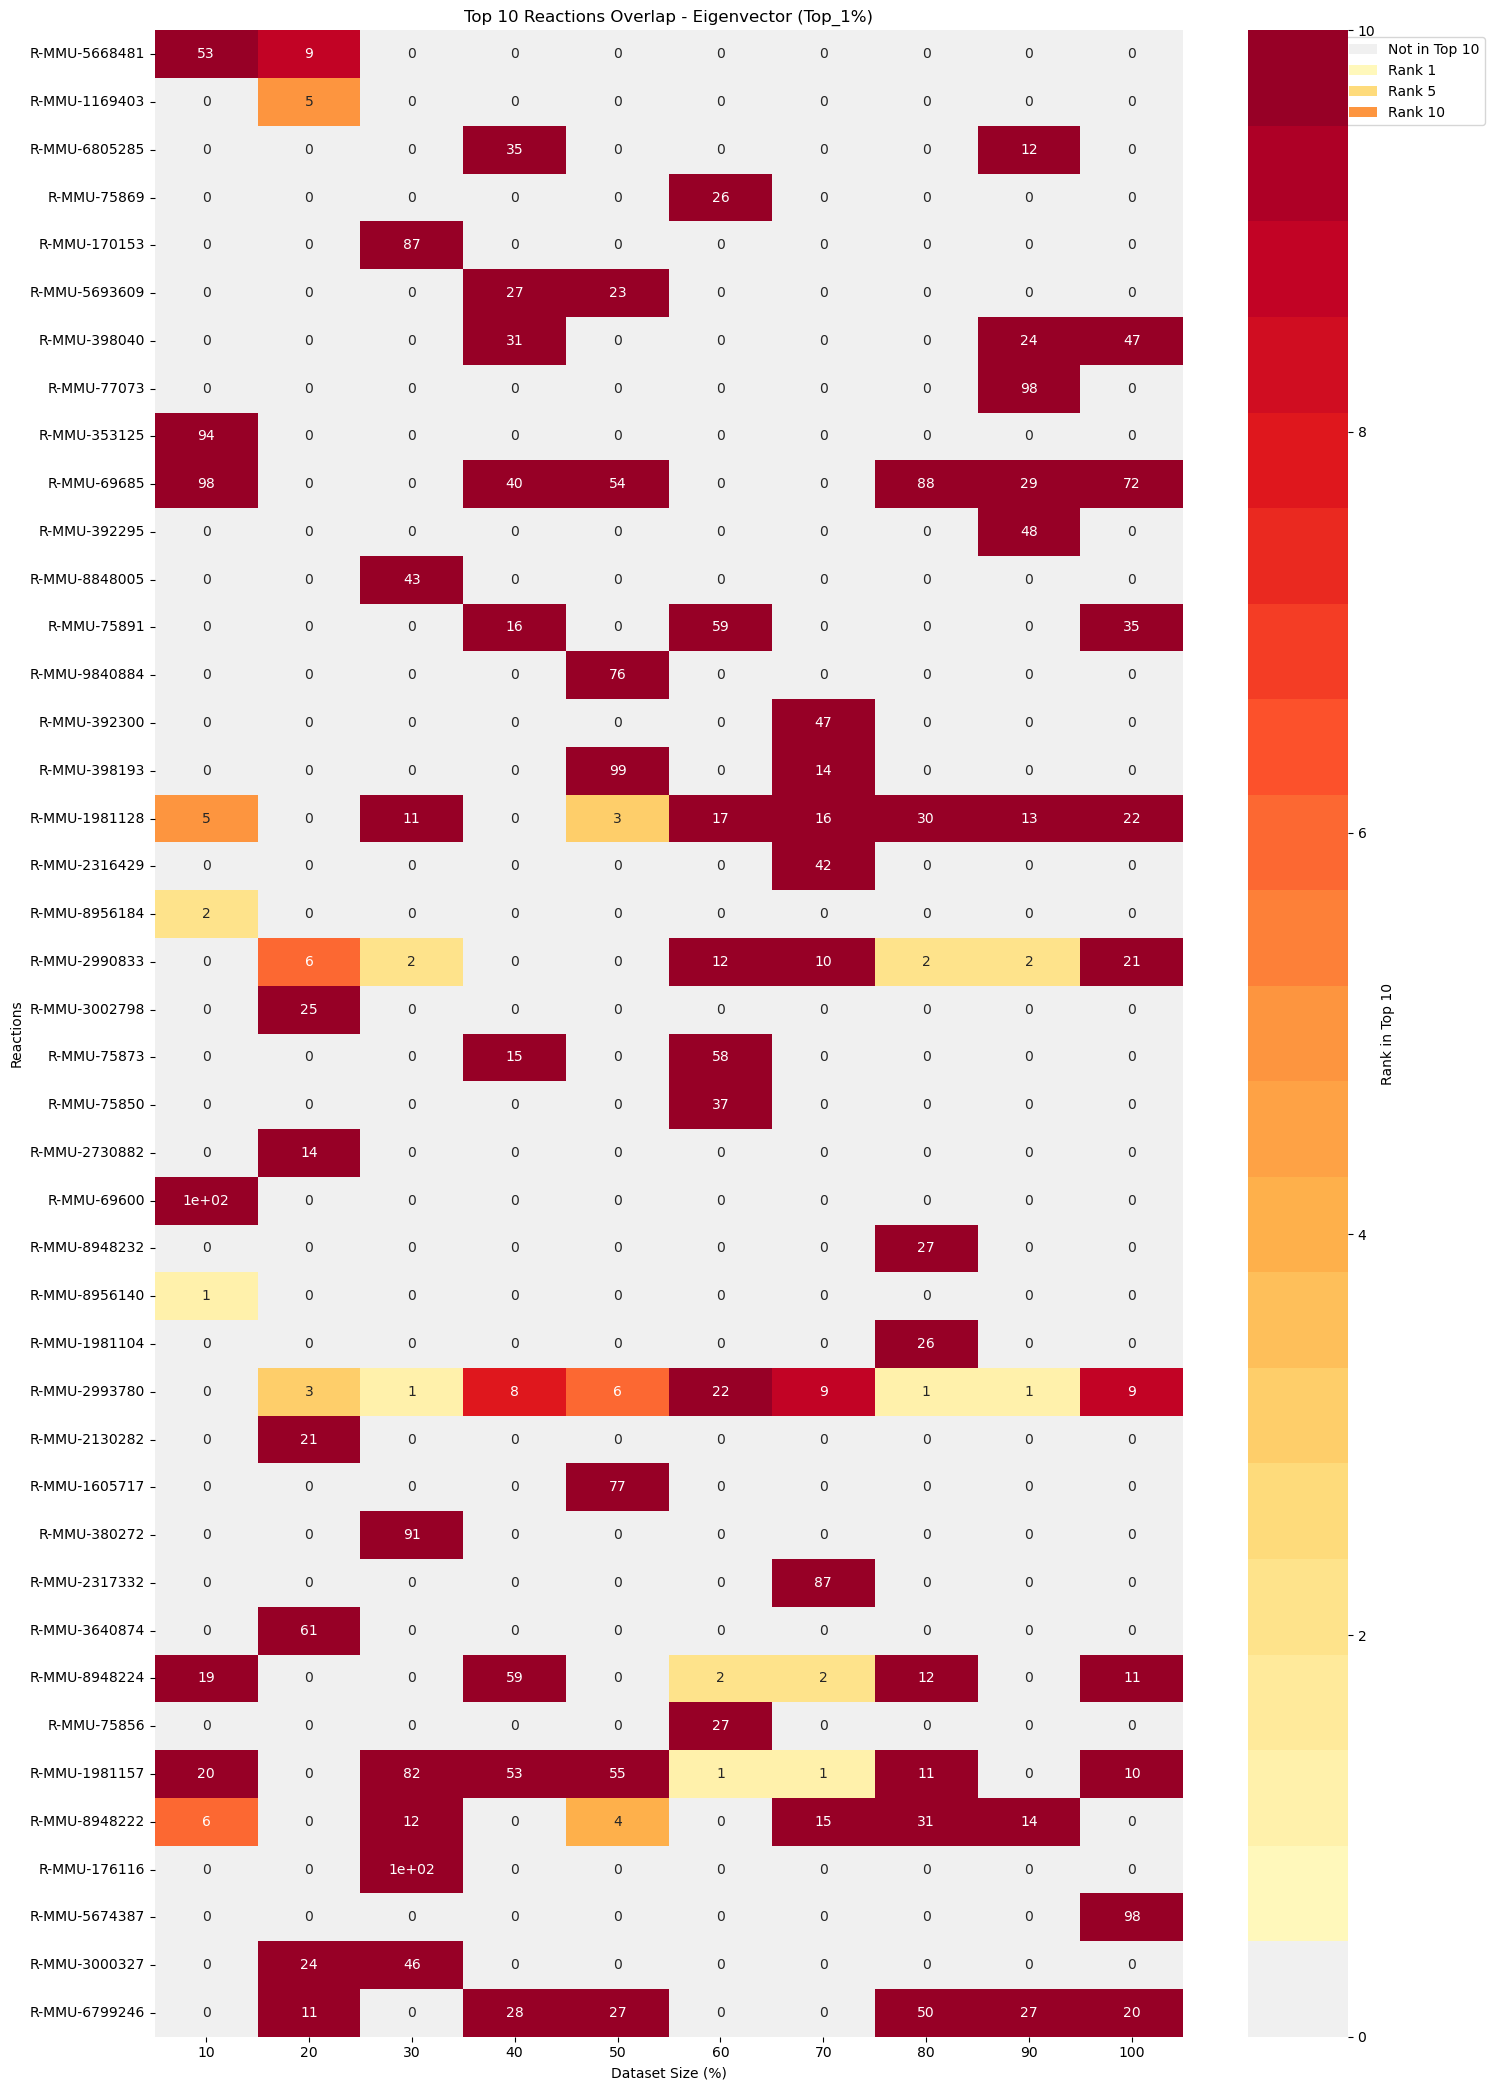


Total unique reactions in all top 10 lists: 42

Reactions appearing in all datasets:


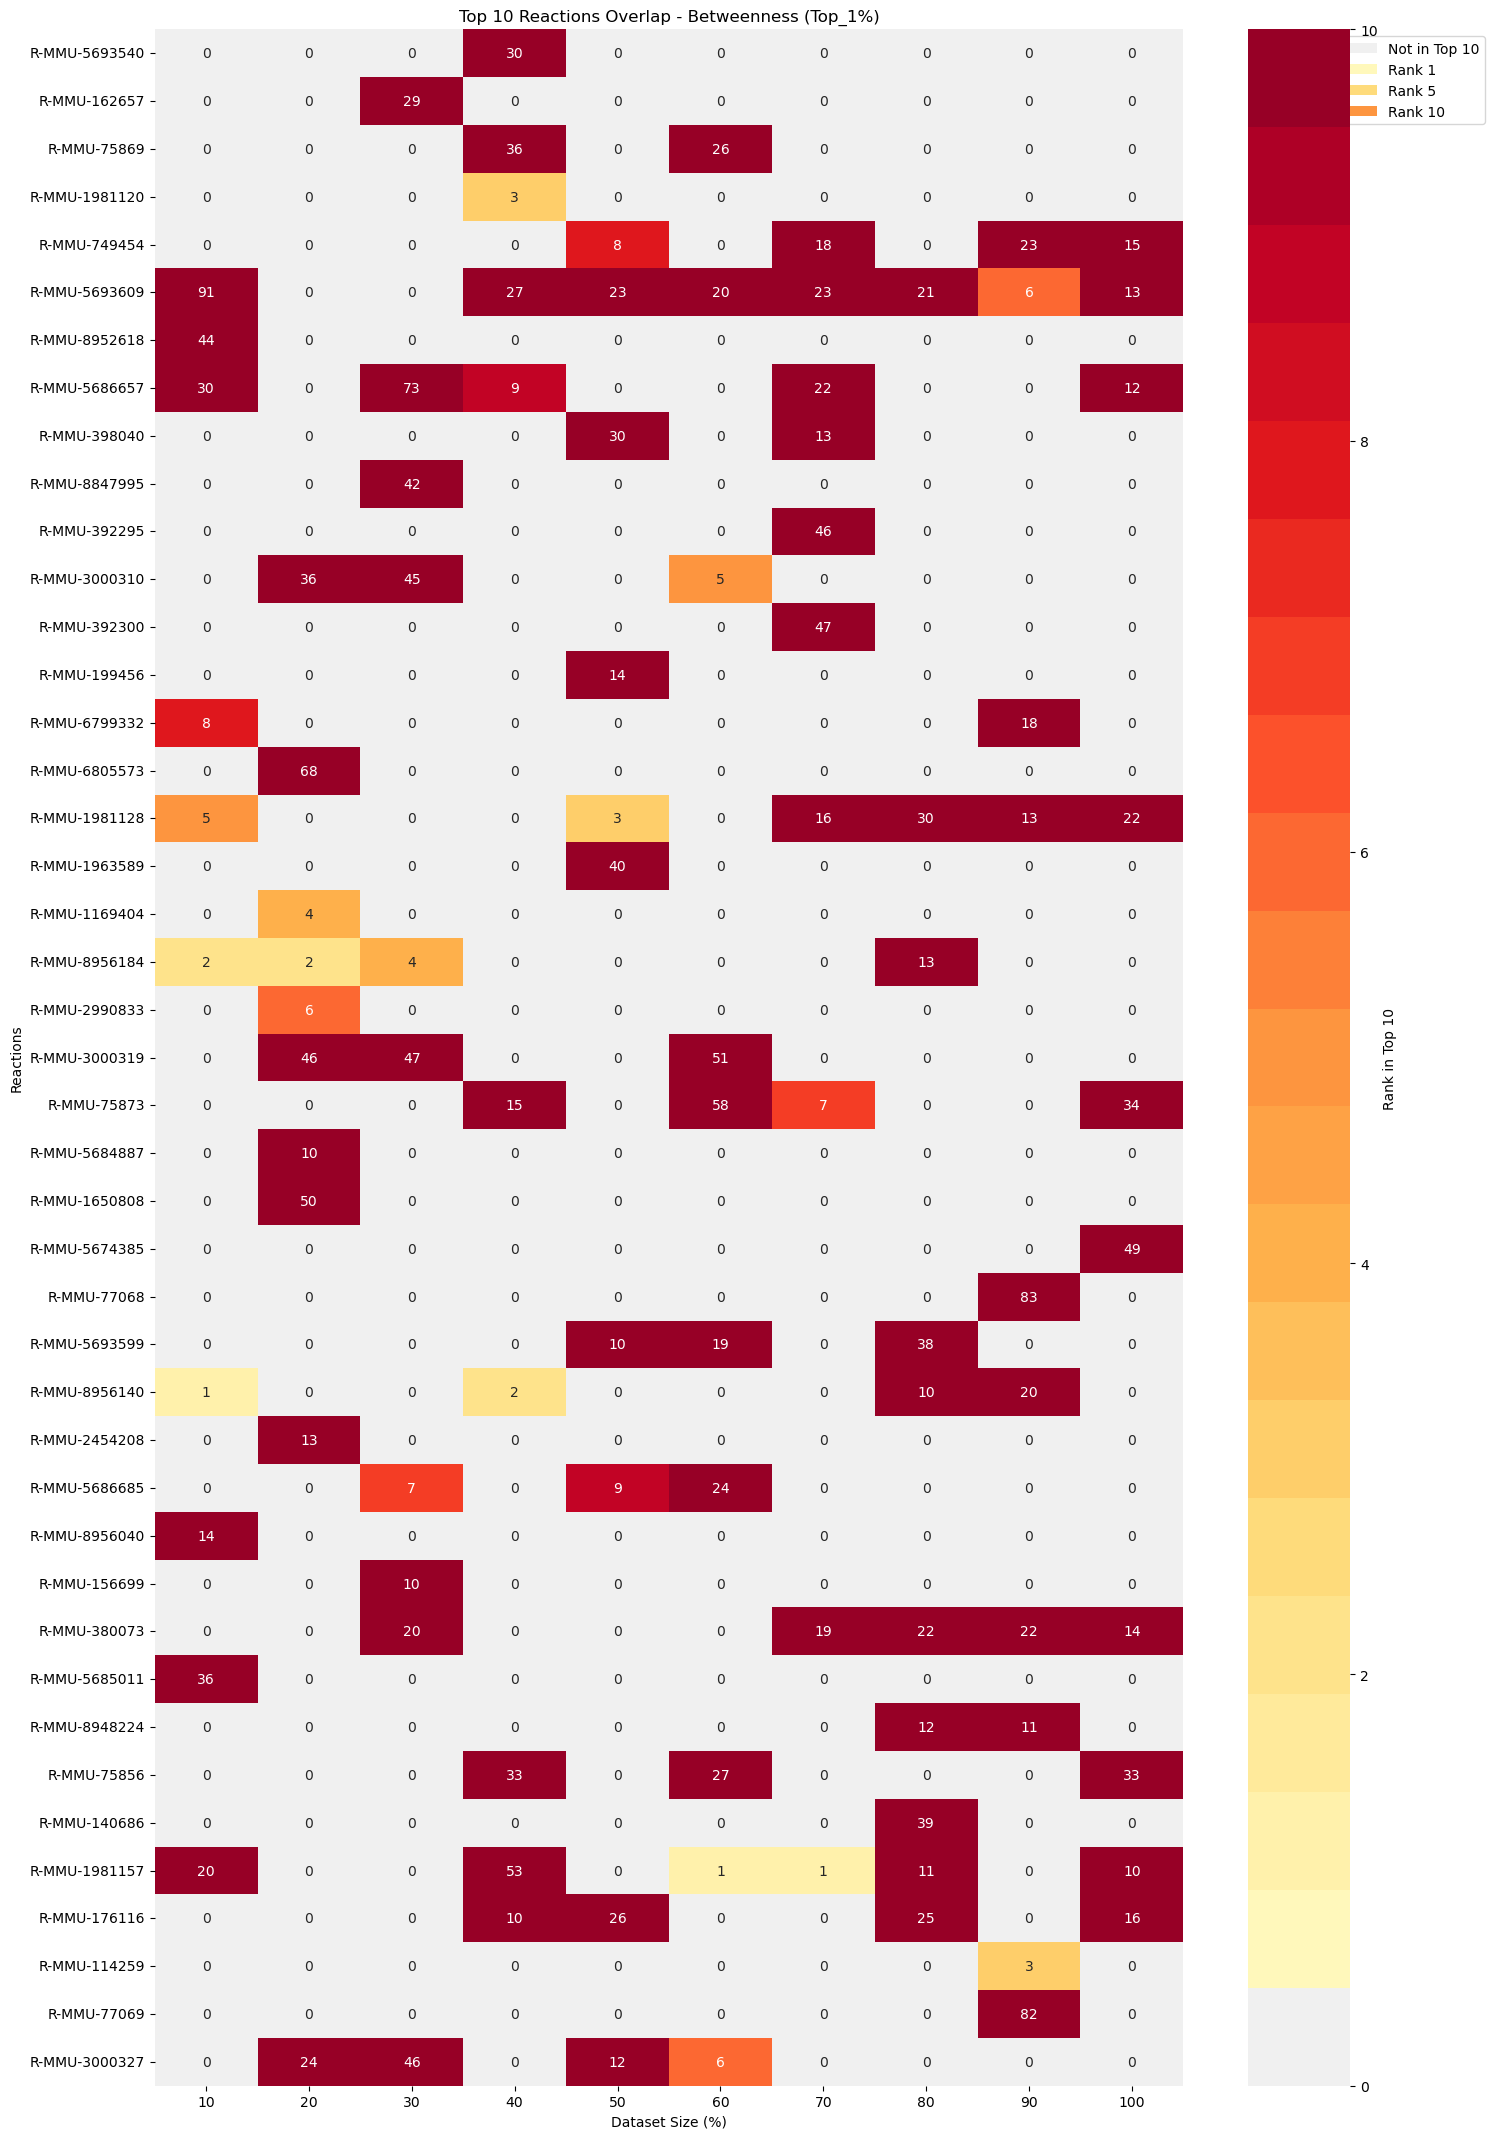


Total unique reactions in all top 10 lists: 43

Reactions appearing in all datasets:


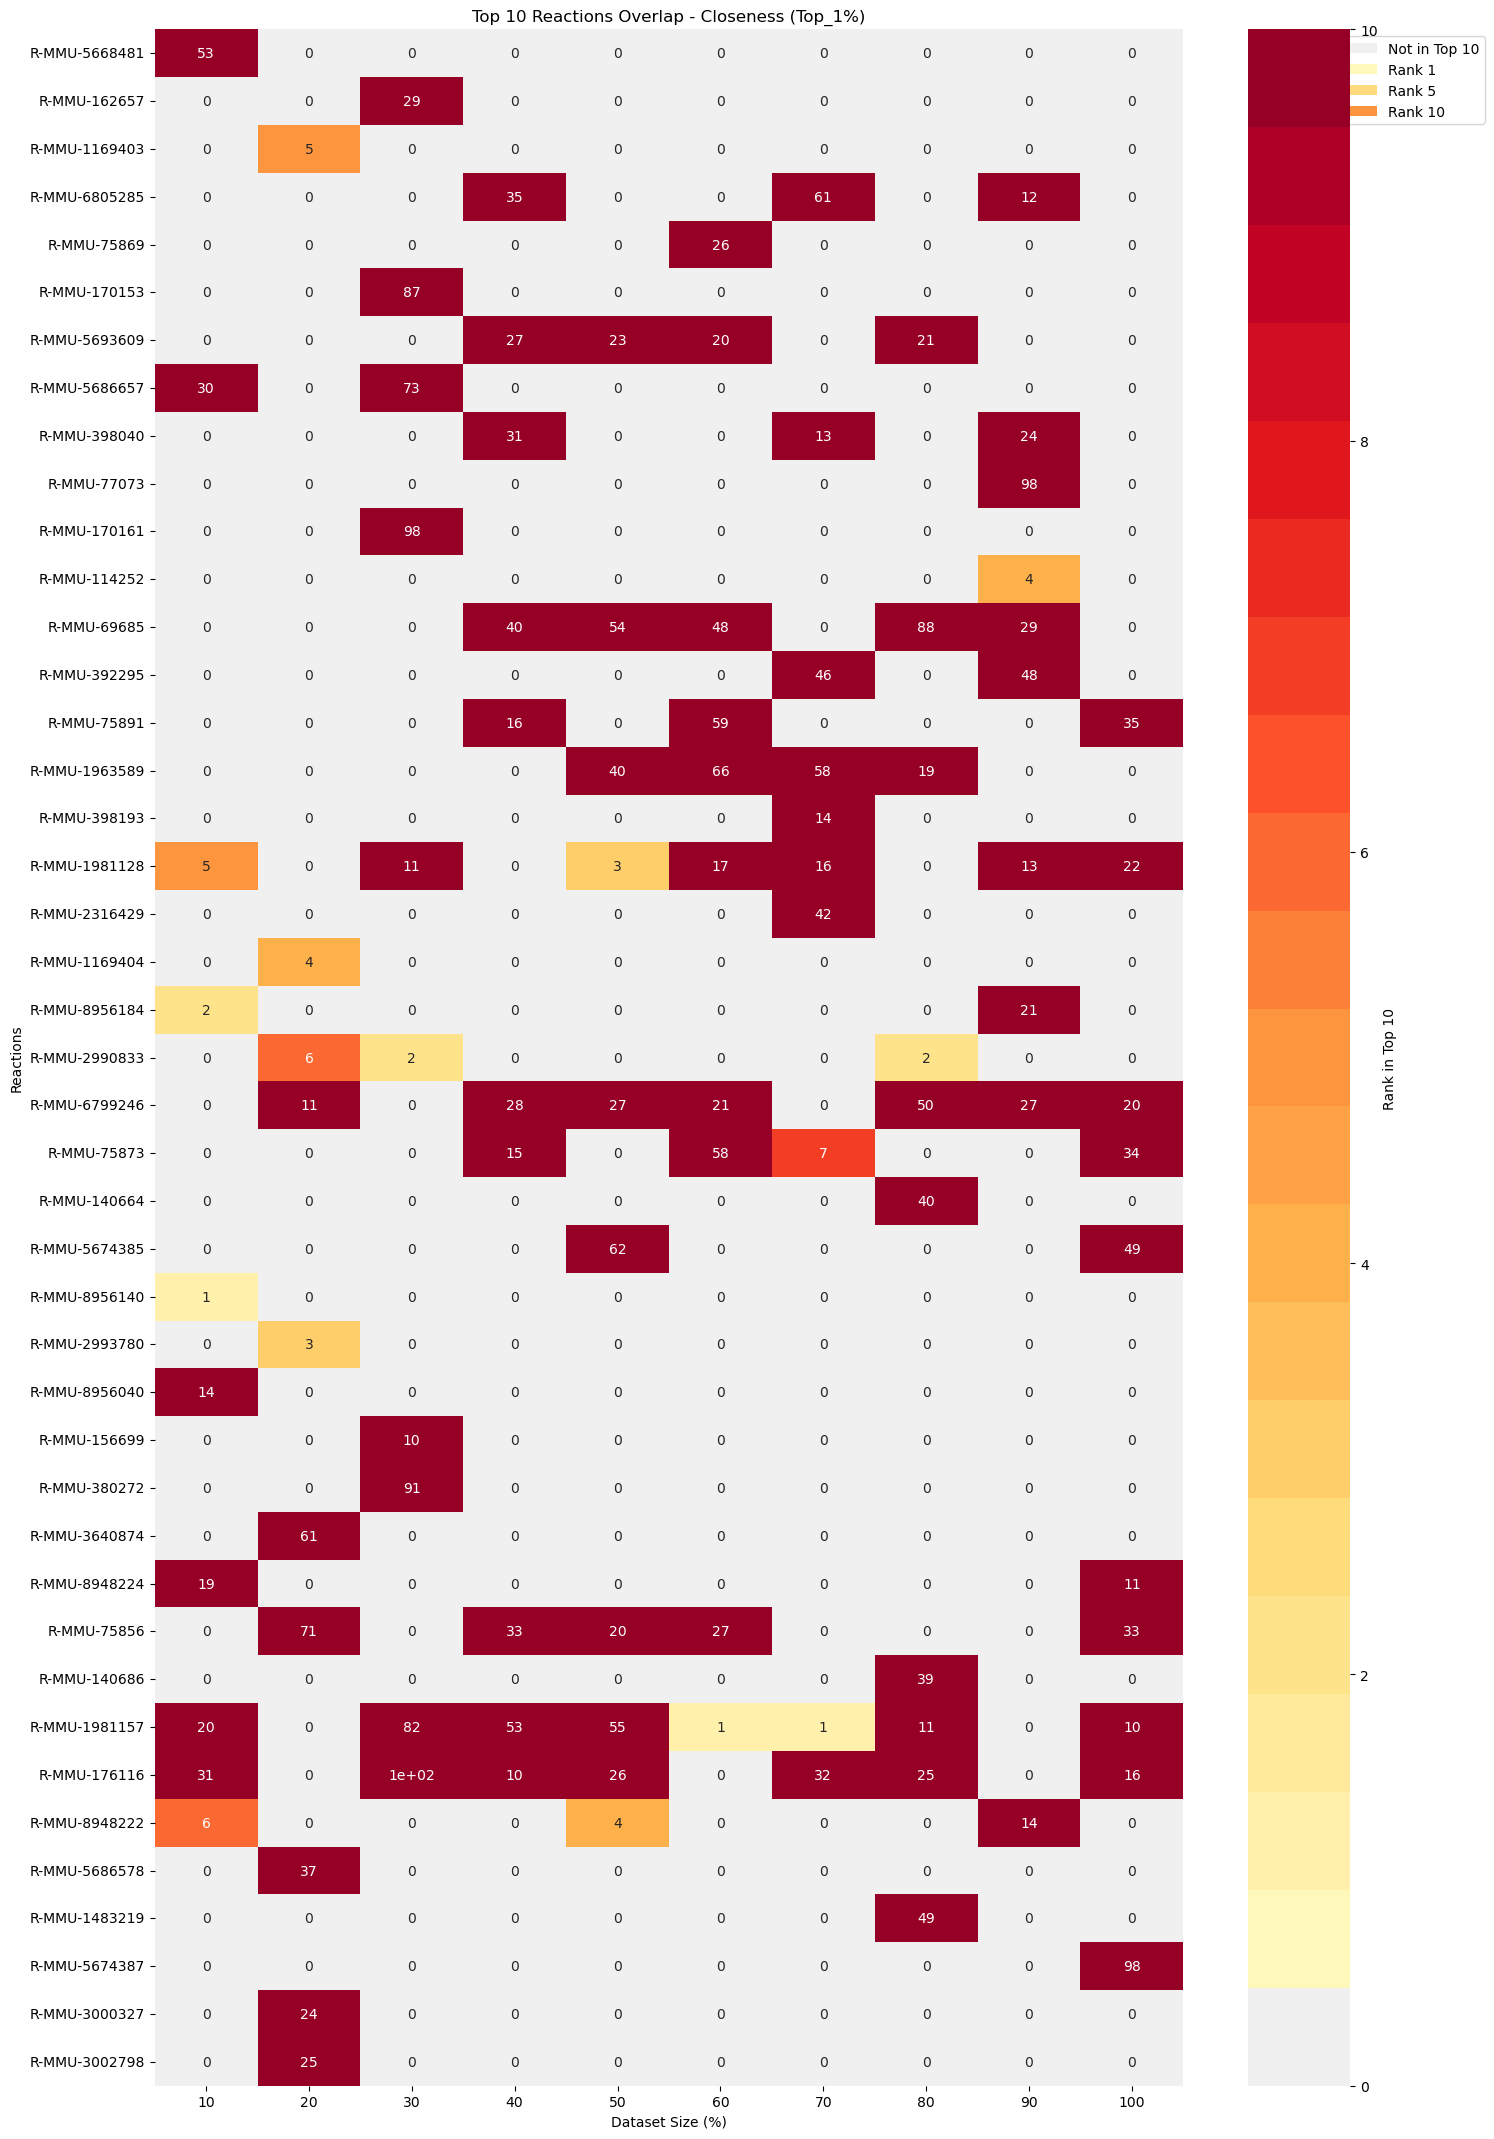


Total unique reactions in all top 10 lists: 43

Reactions appearing in all datasets:


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def get_top_10_reactions(df, centrality_type):
    return df.nlargest(10, centrality_type)[['Node', centrality_type]]

def analyze_reaction_overlap(folder_path, centrality_type, mode):
    datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
               'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
    
    all_top_reactions = {}
    for dataset in datasets:
        file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
        df = pd.read_csv(file_path, sep=",")
        all_top_reactions[dataset] = get_top_10_reactions(df, centrality_type)
#     print(all_top_reactions)
    unique_reactions = set()
    for df in all_top_reactions.values():
        unique_reactions.update(df['Node'].values)
    
    result_matrix = []
    for reaction in unique_reactions:
        row = []
        for dataset in datasets:
            if reaction in all_top_reactions[dataset]['Node'].values:
                rank = all_top_reactions[dataset][all_top_reactions[dataset]['Node'] == reaction].index[0] + 1
                row.append(rank)
            else:
                row.append(0)
        result_matrix.append(row)
#     print(result_matrix)
    result_df = pd.DataFrame(result_matrix, 
                           index=list(unique_reactions), 
                           columns=[d.replace('graph_', '') for d in datasets])
    plt.figure(figsize=(15, len(unique_reactions)*0.5))
    
    colors = ['#f0f0f0'] + sns.color_palette("YlOrRd", 20).as_hex()  
    
    sns.heatmap(result_df, 
                cmap=colors,
                center=None,
                vmin=0, 
                vmax=10,
                annot=result_df,
                cbar_kws={'label': 'Rank in Top 10'},
                yticklabels=True)
    
    plt.title(f'Top 10 Reactions Overlap - {centrality_type} ({mode})')
    plt.xlabel('Dataset Size (%)')
    plt.ylabel('Reactions')
    
    legend_elements = [
        Patch(facecolor='#f0f0f0', label='Not in Top 10'),
        Patch(facecolor=colors[1], label='Rank 1'),
        Patch(facecolor=colors[5], label='Rank 5'),
        Patch(facecolor=colors[10], label='Rank 10')
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal unique reactions in all top 10 lists: {len(unique_reactions)}")
    print("\nReactions appearing in all datasets:")
    common_reactions = result_df[result_df.sum(axis=1) > 0].index
    if len(common_reactions) > 0:
        for reaction in common_reactions:
            datasets_count = (result_df.loc[reaction] > 0).sum()
            if datasets_count == len(datasets):
                print(f"- {reaction}")

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'

for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
    for mode in ['Top_1%']:
        analyze_reaction_overlap(folder_path, centrality_type, mode)

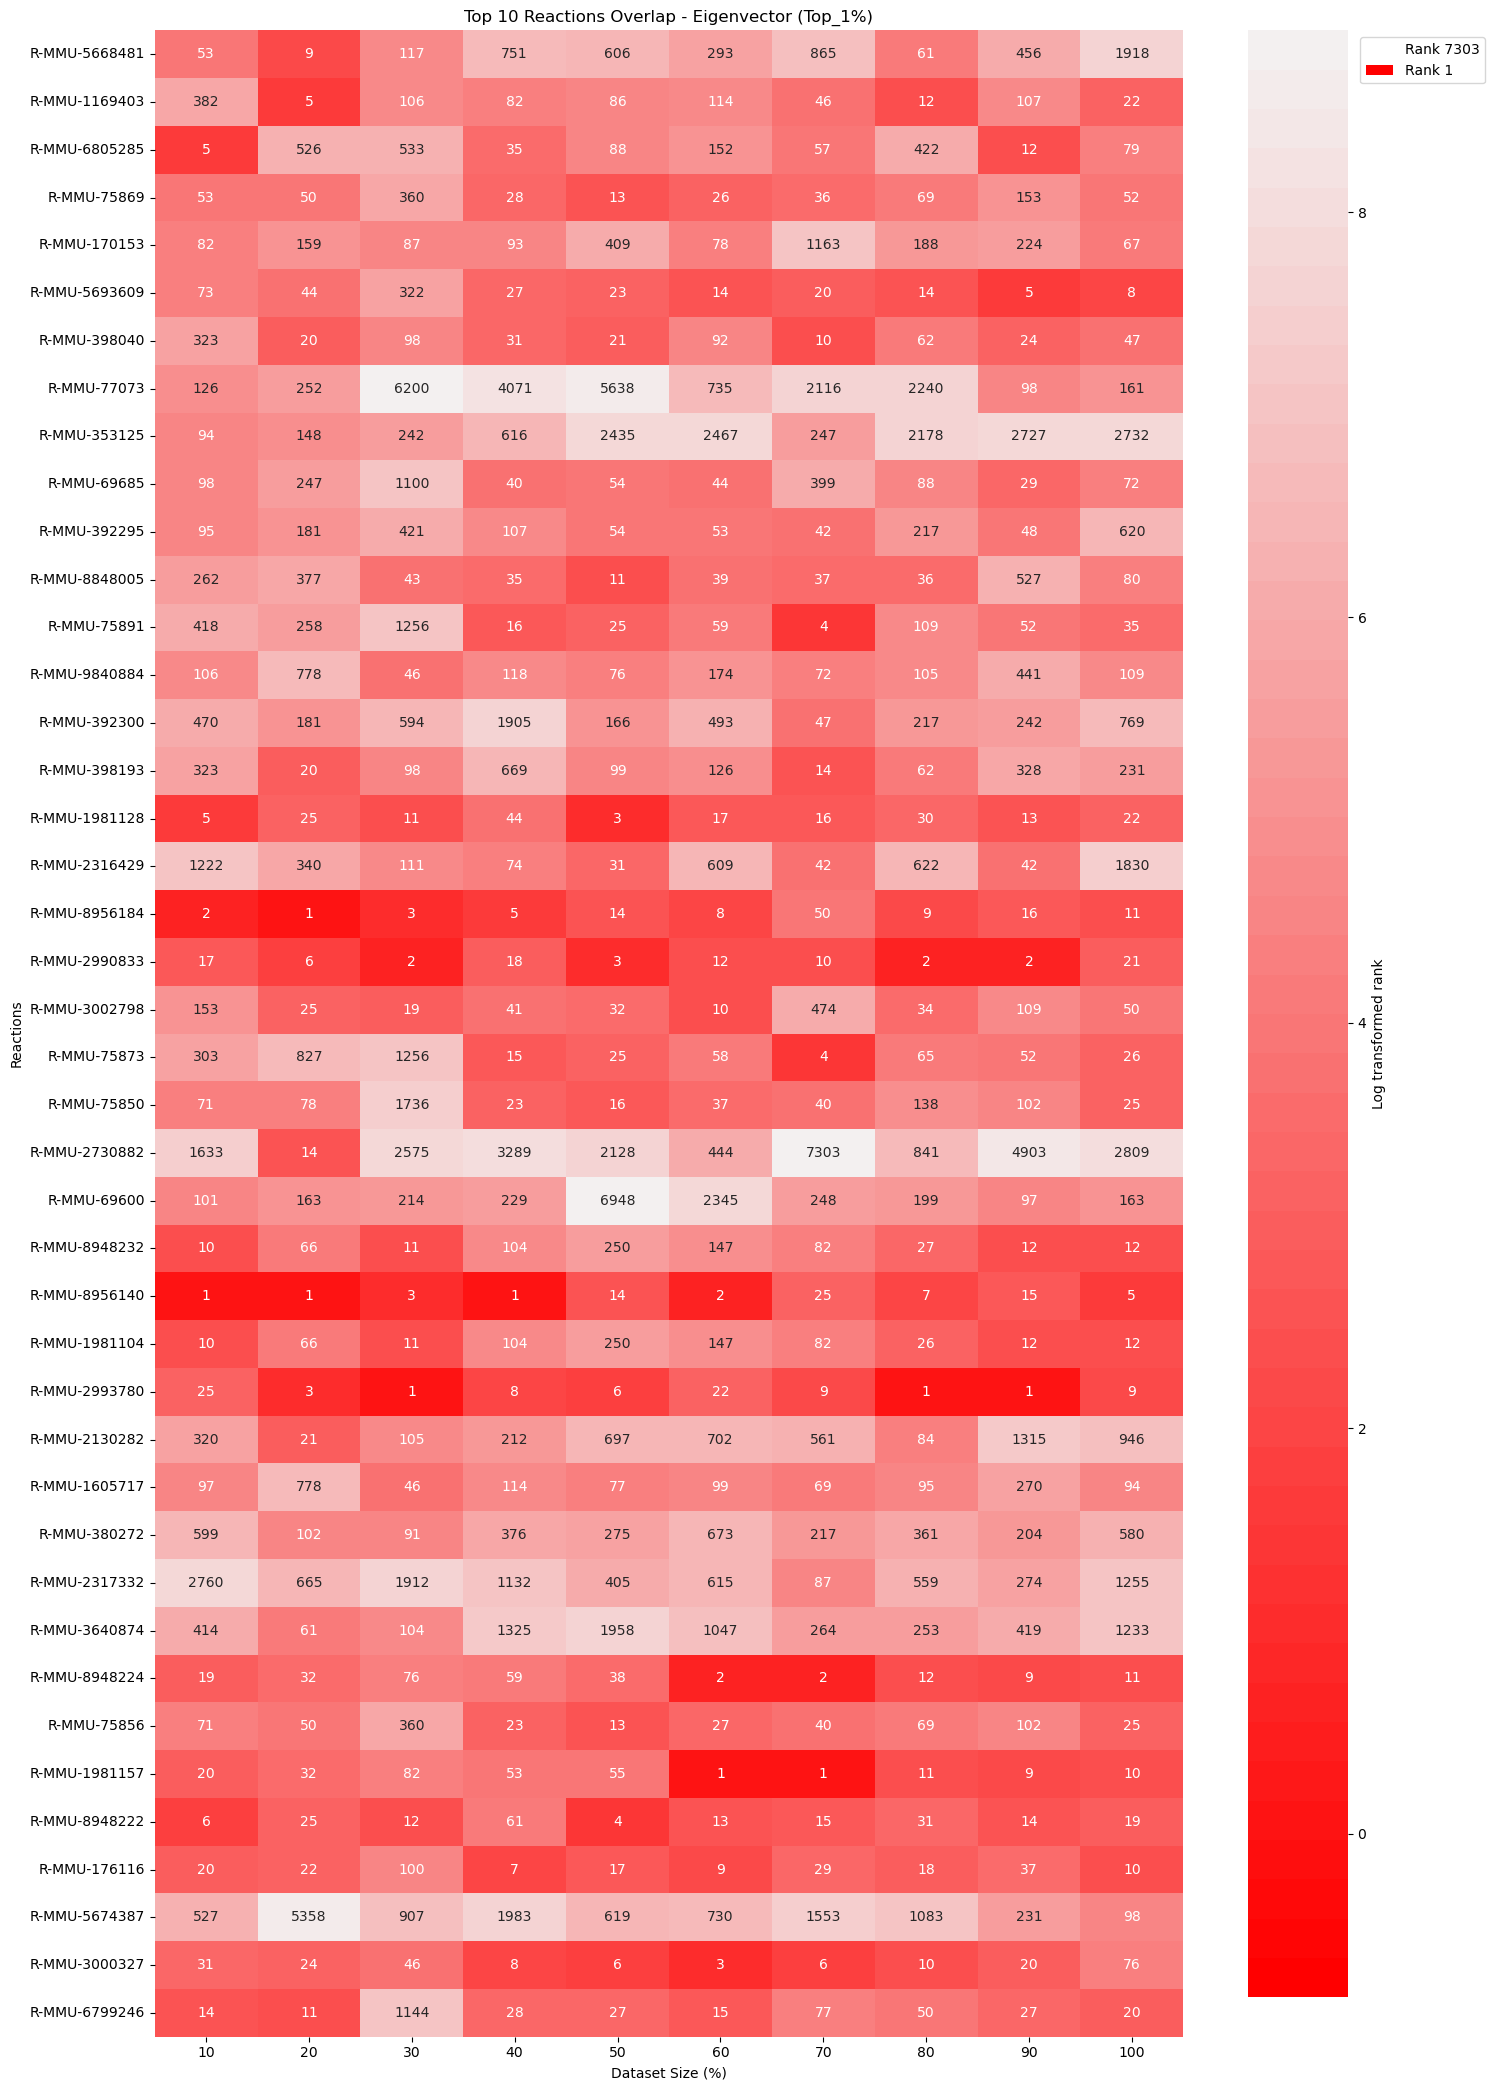


Total unique reactions in top 10 lists: 42

Reactions that appear in all datasets' top 10:


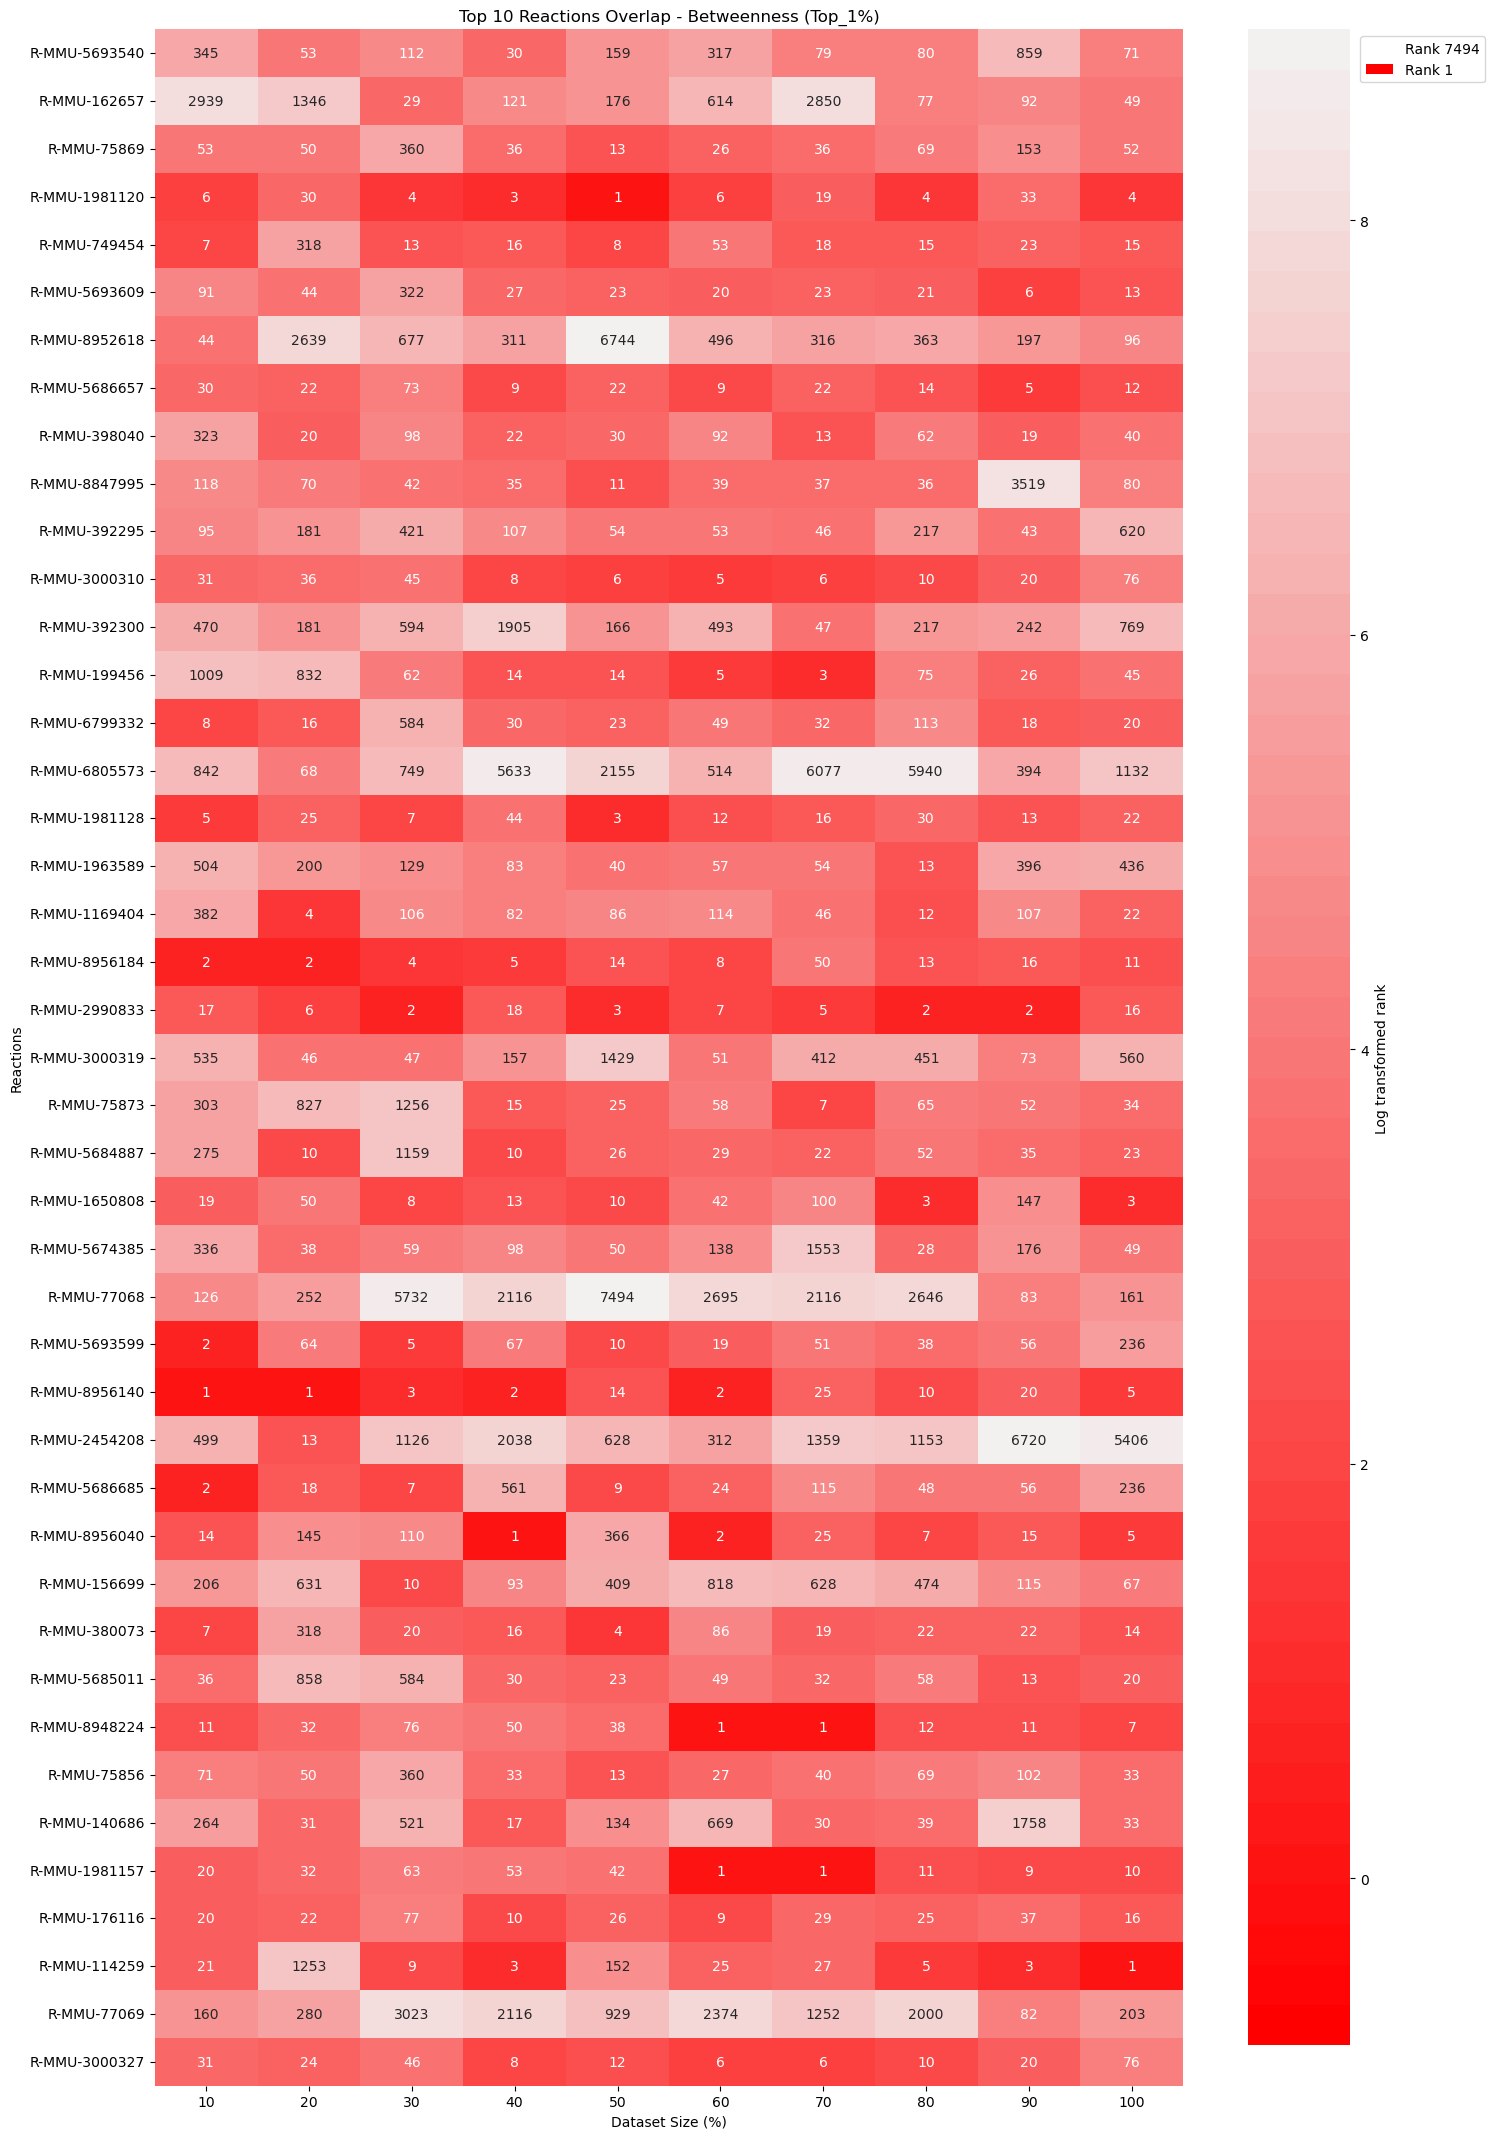


Total unique reactions in top 10 lists: 43

Reactions that appear in all datasets' top 10:


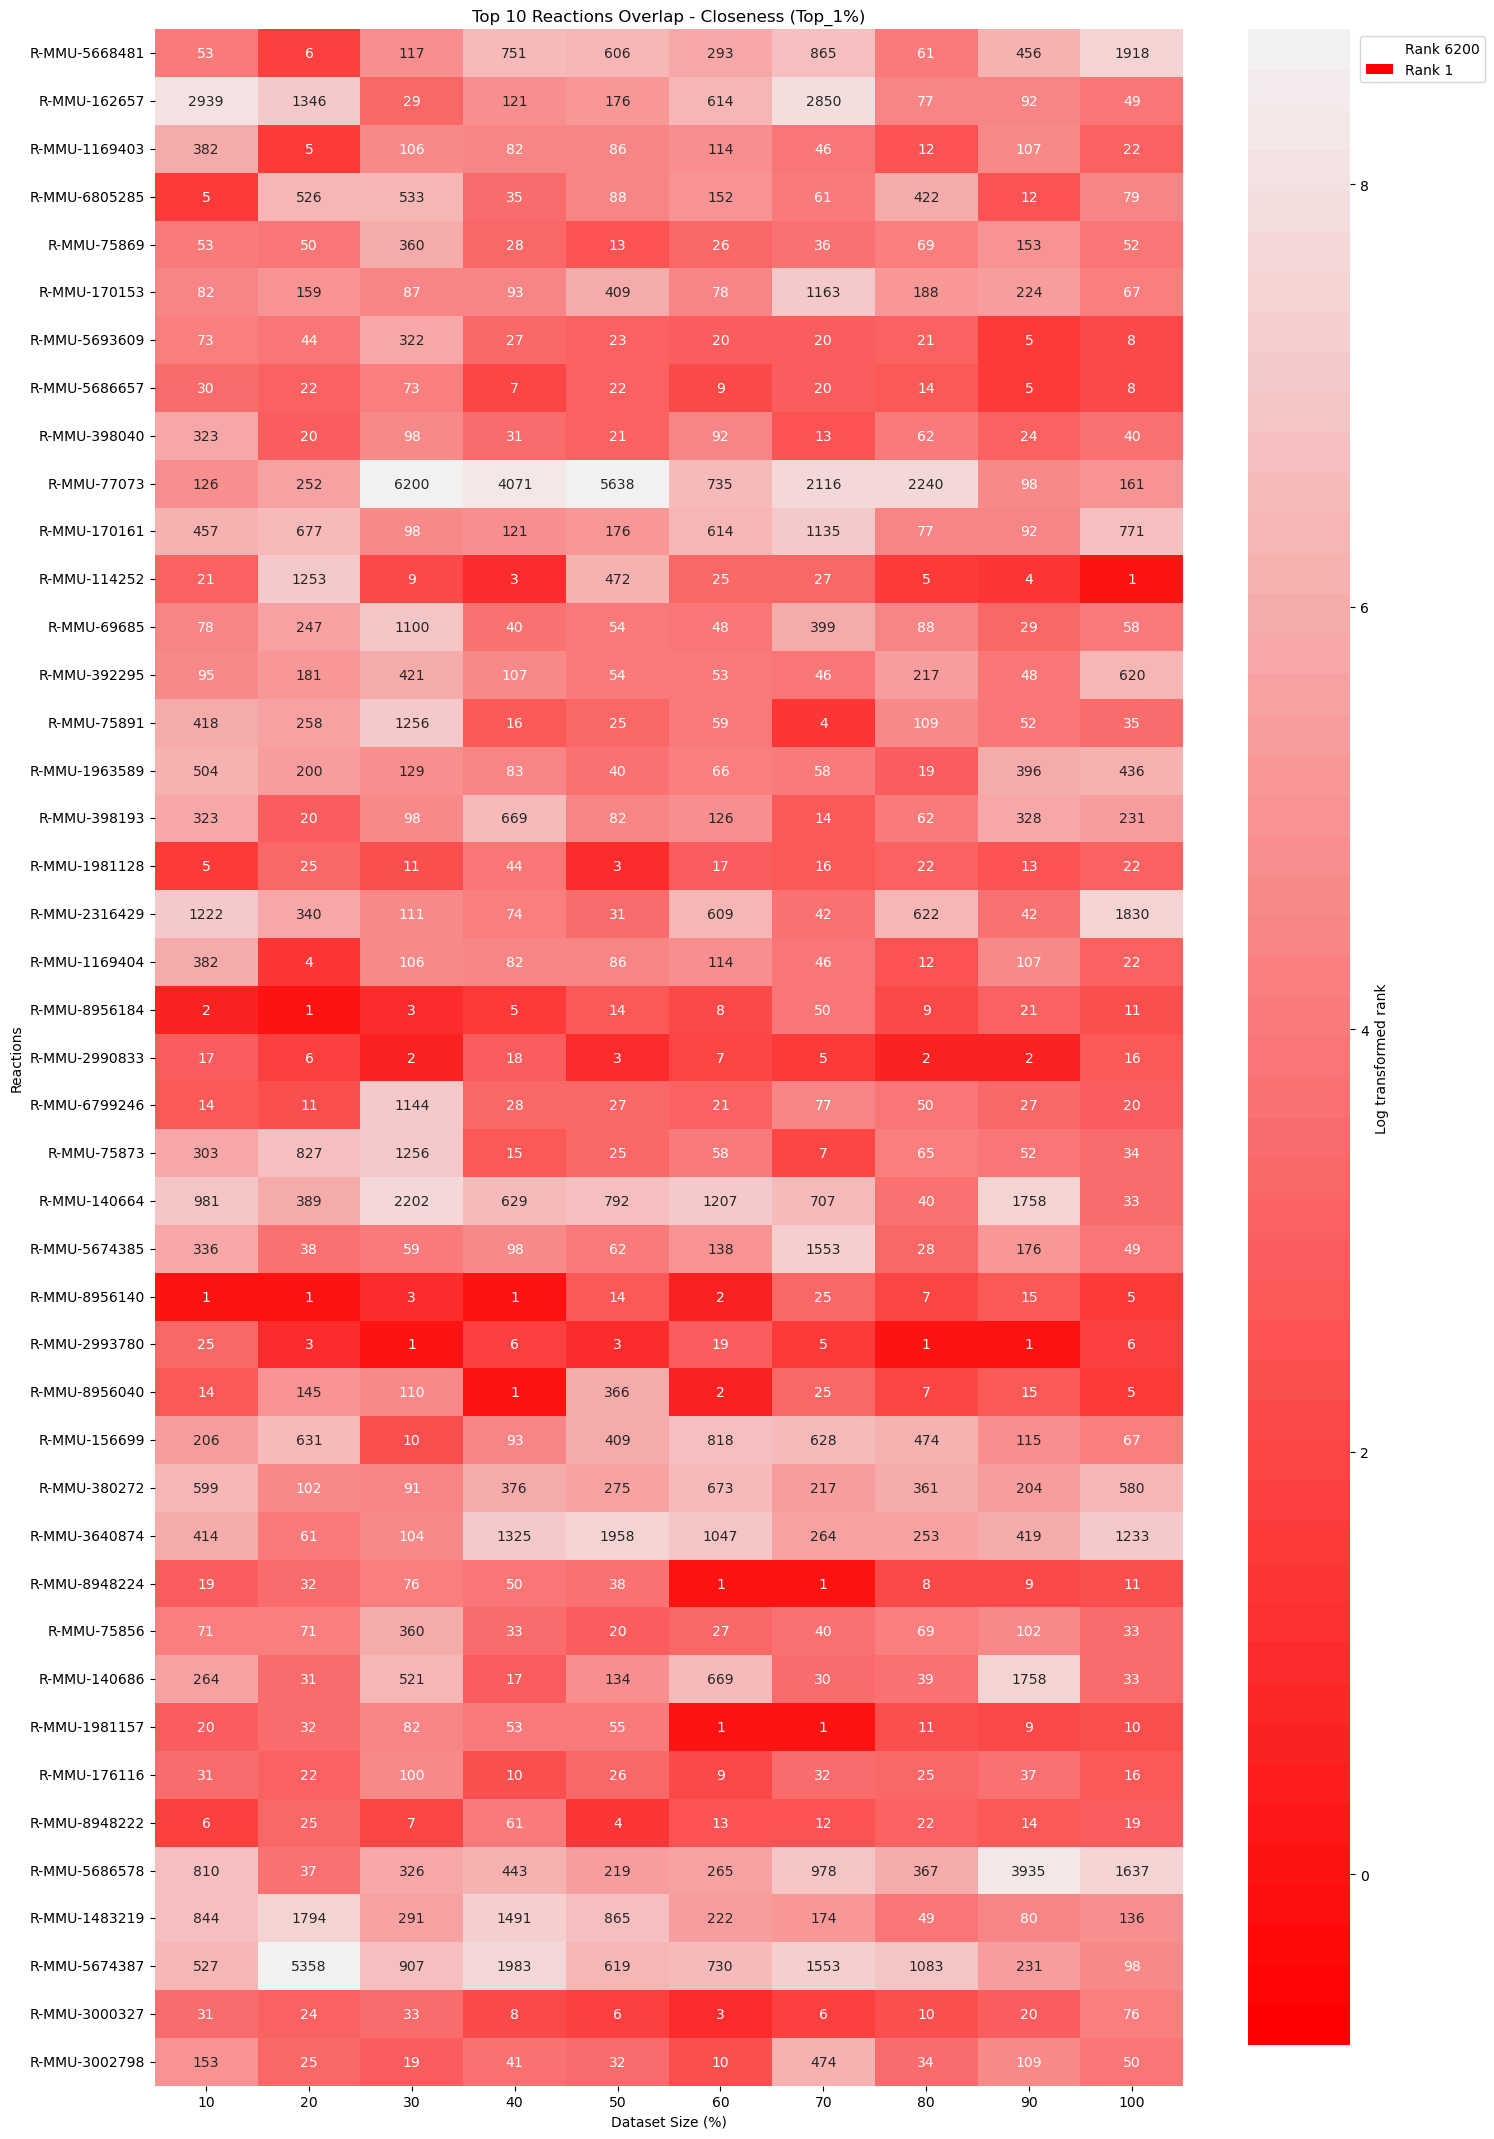


Total unique reactions in top 10 lists: 43

Reactions that appear in all datasets' top 10:


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def get_top_10_reactions(df, centrality_type):
    """获取前10个reactions及其对应的centrality值"""
    return df.nlargest(10, centrality_type)[['Node', centrality_type]]

def analyze_reaction_overlap(folder_path, centrality_type, mode):
    datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
               'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
    
    all_top_reactions = {}
    
    all_data = {
        'graph_10': graph_10,
        'graph_20': graph_20,
        'graph_30': graph_30,
        'graph_40': graph_40,
        'graph_50': graph_50,
        'graph_60': graph_60,
        'graph_70': graph_70,
        'graph_80': graph_80,
        'graph_90': graph_90,
        'graph_100': graph_100
    }
    
    for dataset in datasets:
        file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
        df = pd.read_csv(file_path, sep=",")
        all_top_reactions[dataset] = get_top_10_reactions(df, centrality_type)
    
    unique_reactions = set()
    for df in all_top_reactions.values():
        unique_reactions.update(df['Node'].values)
    
    result_matrix = []
    for reaction in unique_reactions:
        row = []
        for dataset in datasets:
            if reaction in all_top_reactions[dataset]['Node'].values:
                rank = all_top_reactions[dataset][all_top_reactions[dataset]['Node'] == reaction].index[0] + 1
                row.append(rank)
            else:
                original_df = all_data[dataset]
                mask = (original_df['start'] == reaction) | (original_df['end'] == reaction)
                if mask.any():  
                    index = original_df[mask].index[0] + 1
                else:
                    index = -1  
                row.append(index)
        result_matrix.append(row)
    
    result_df = pd.DataFrame(result_matrix, 
                           index=list(unique_reactions), 
                           columns=[d.replace('graph_', '') for d in datasets])
    
    plt.figure(figsize=(15, len(unique_reactions)*0.5))

    result_df_display = result_df.copy()

    result_df_display = result_df_display.where(result_df_display <= 0,  
        lambda x: np.log(x))  

    max_val = result_df_display.max().max()

    colors = ['#FFFFFF']  
    colors.extend(sns.light_palette("red", n_colors=50, as_cmap=False).as_hex()[::-1])

    sns.heatmap(result_df_display, 
                cmap=colors,
                center=None,
                vmin=-1,  
                vmax=max_val,  
                annot=result_df,  
                fmt='.0f',
                cbar_kws={'label': 'Log transformed rank'},
                yticklabels=True,
                annot_kws={'size': 10})
    
    plt.title(f'Top 10 Reactions Overlap - {centrality_type} ({mode})')
    plt.xlabel('Dataset Size (%)')
    plt.ylabel('Reactions')
    
    max_rank = int(result_df.max().max())
    legend_elements = [
        Patch(facecolor=colors[0], label=f'Rank {max_rank}'),
        Patch(facecolor=colors[1], label='Rank 1')
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal unique reactions in top 10 lists: {len(unique_reactions)}")
    print("\nReactions that appear in all datasets' top 10:")
    common_reactions = result_df[(result_df <= 10) & (result_df > 0)].dropna(how='any').index
    for reaction in common_reactions:
        print(f"- {reaction}")

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'
for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
    for mode in ['Top_1%']:
        analyze_reaction_overlap(folder_path, centrality_type, mode)

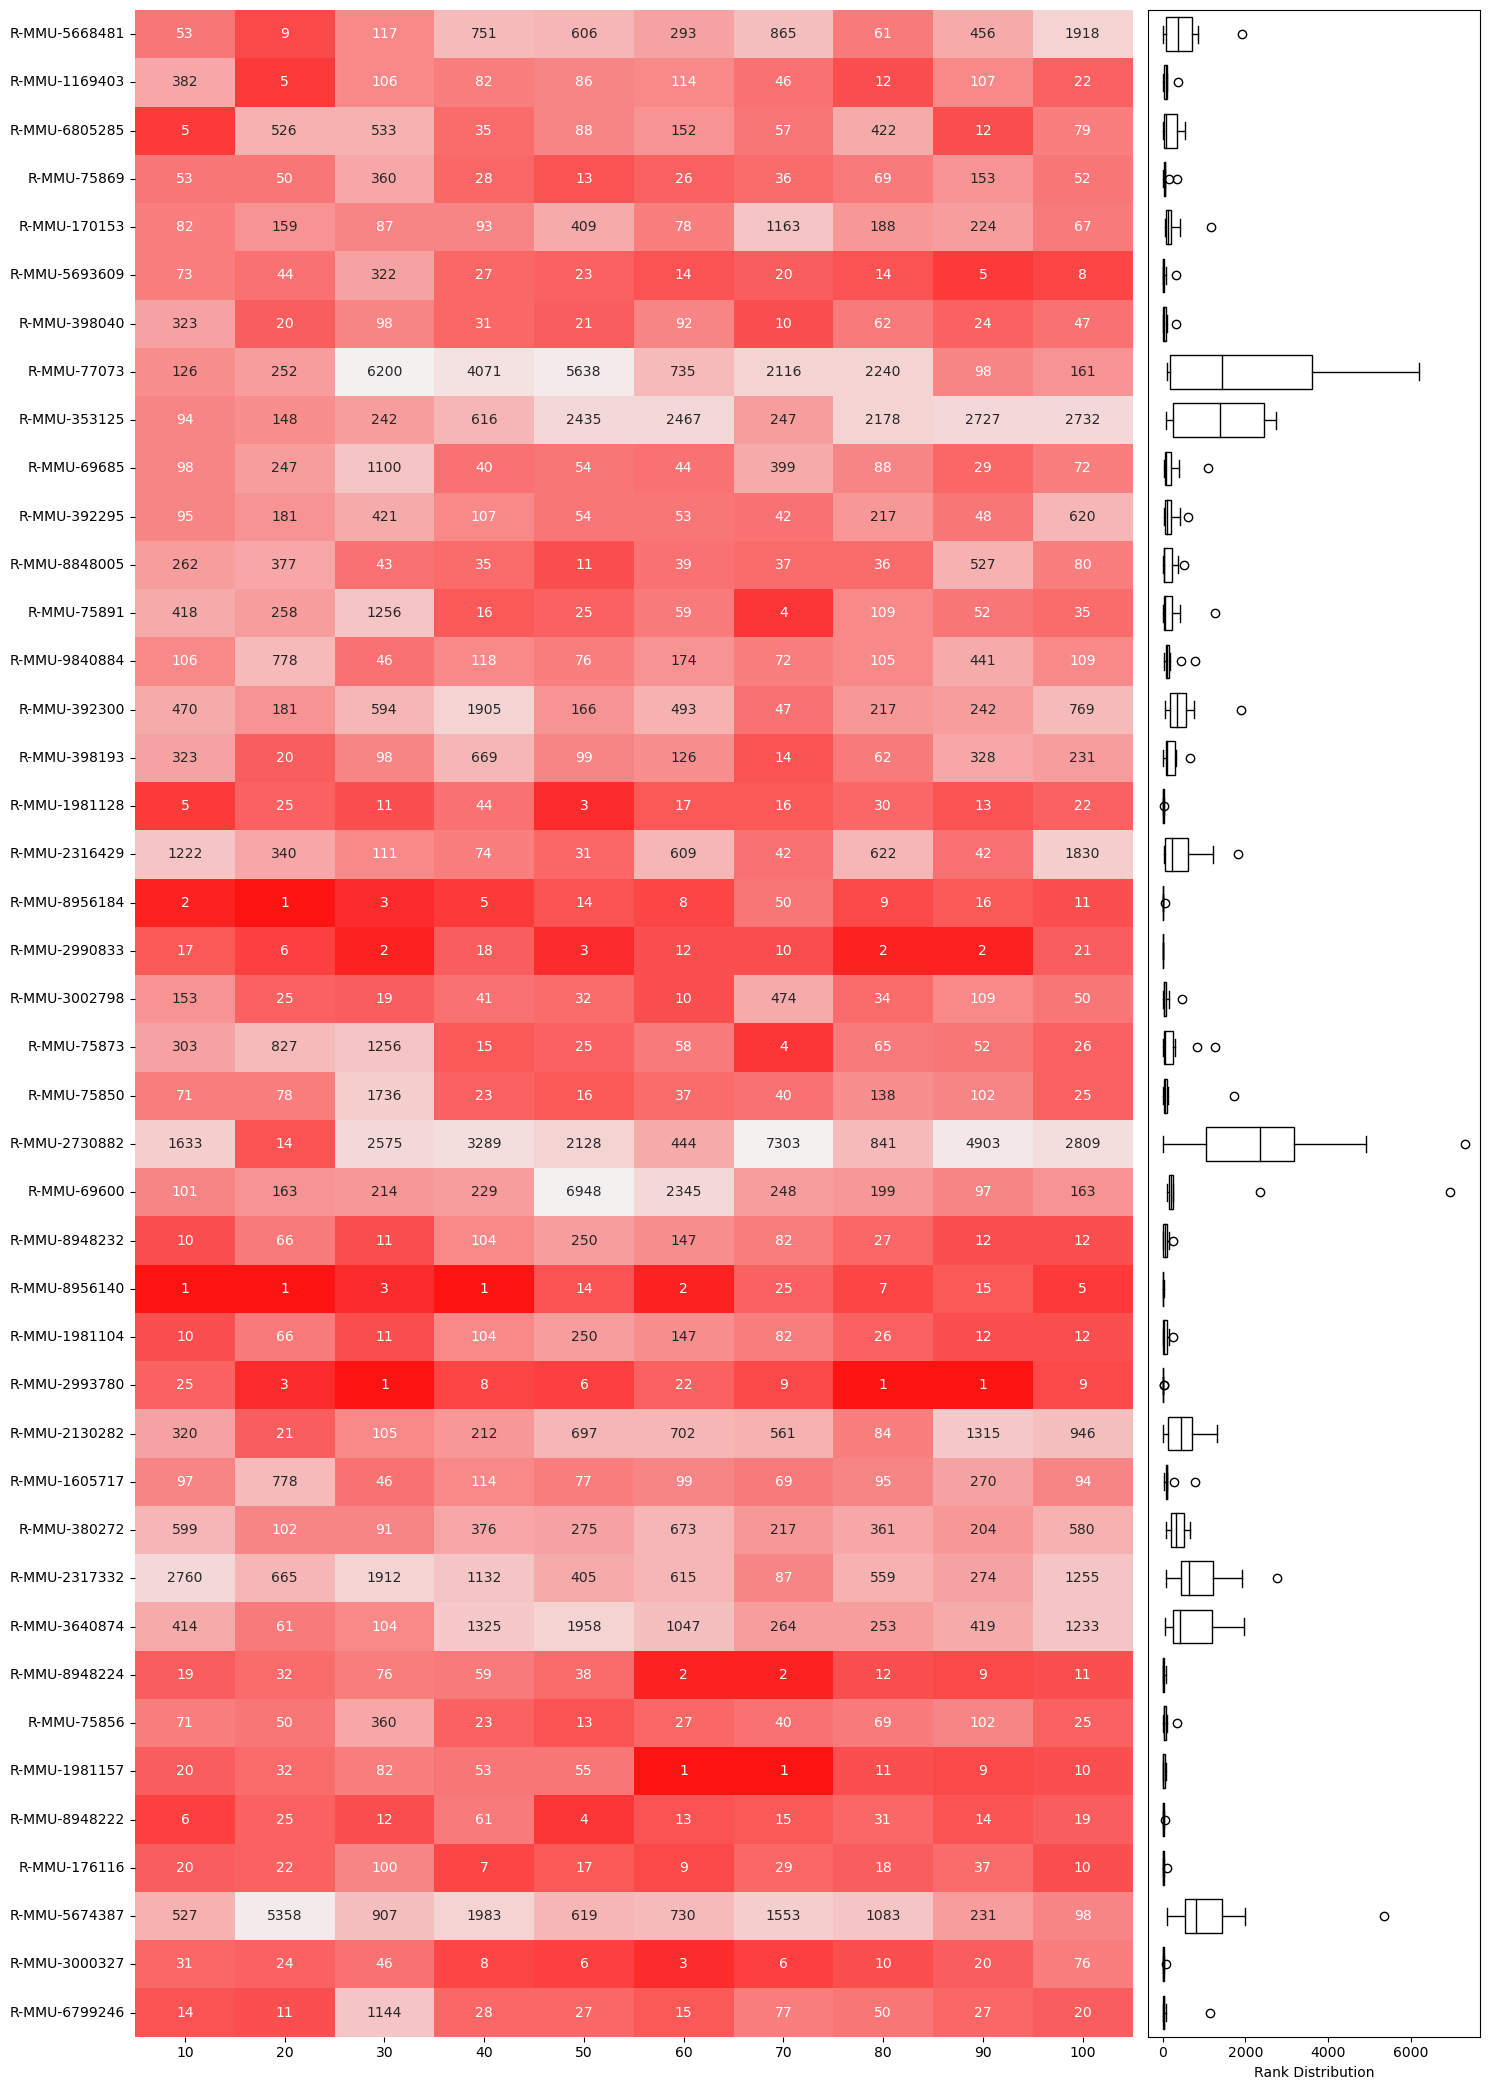

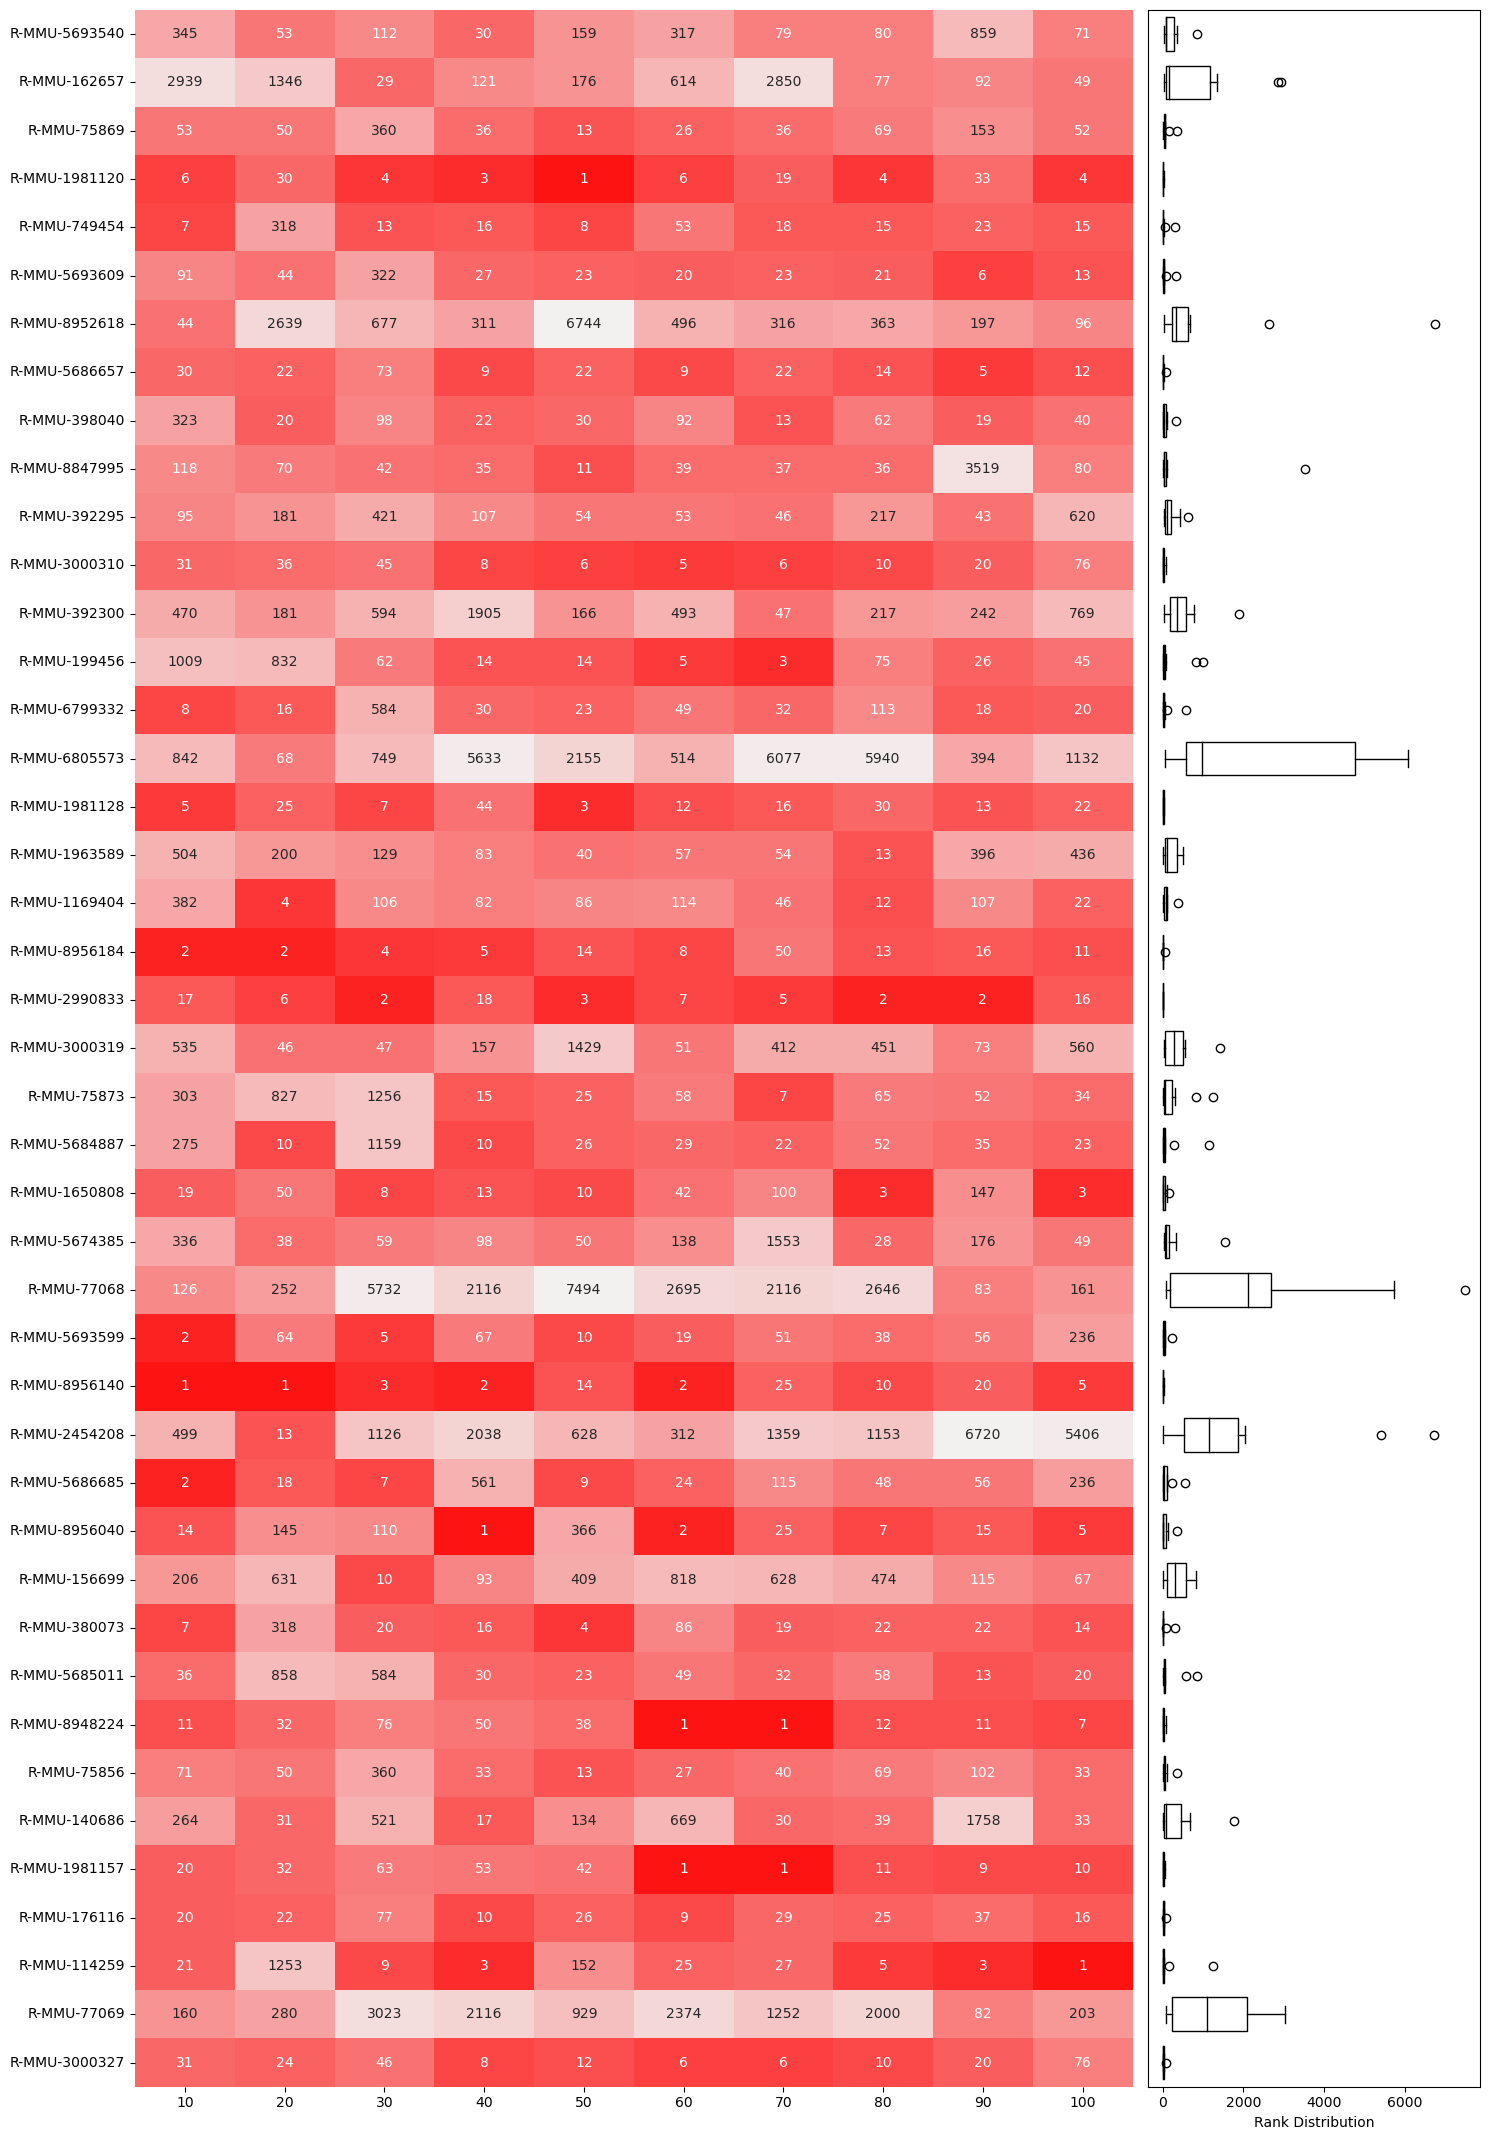

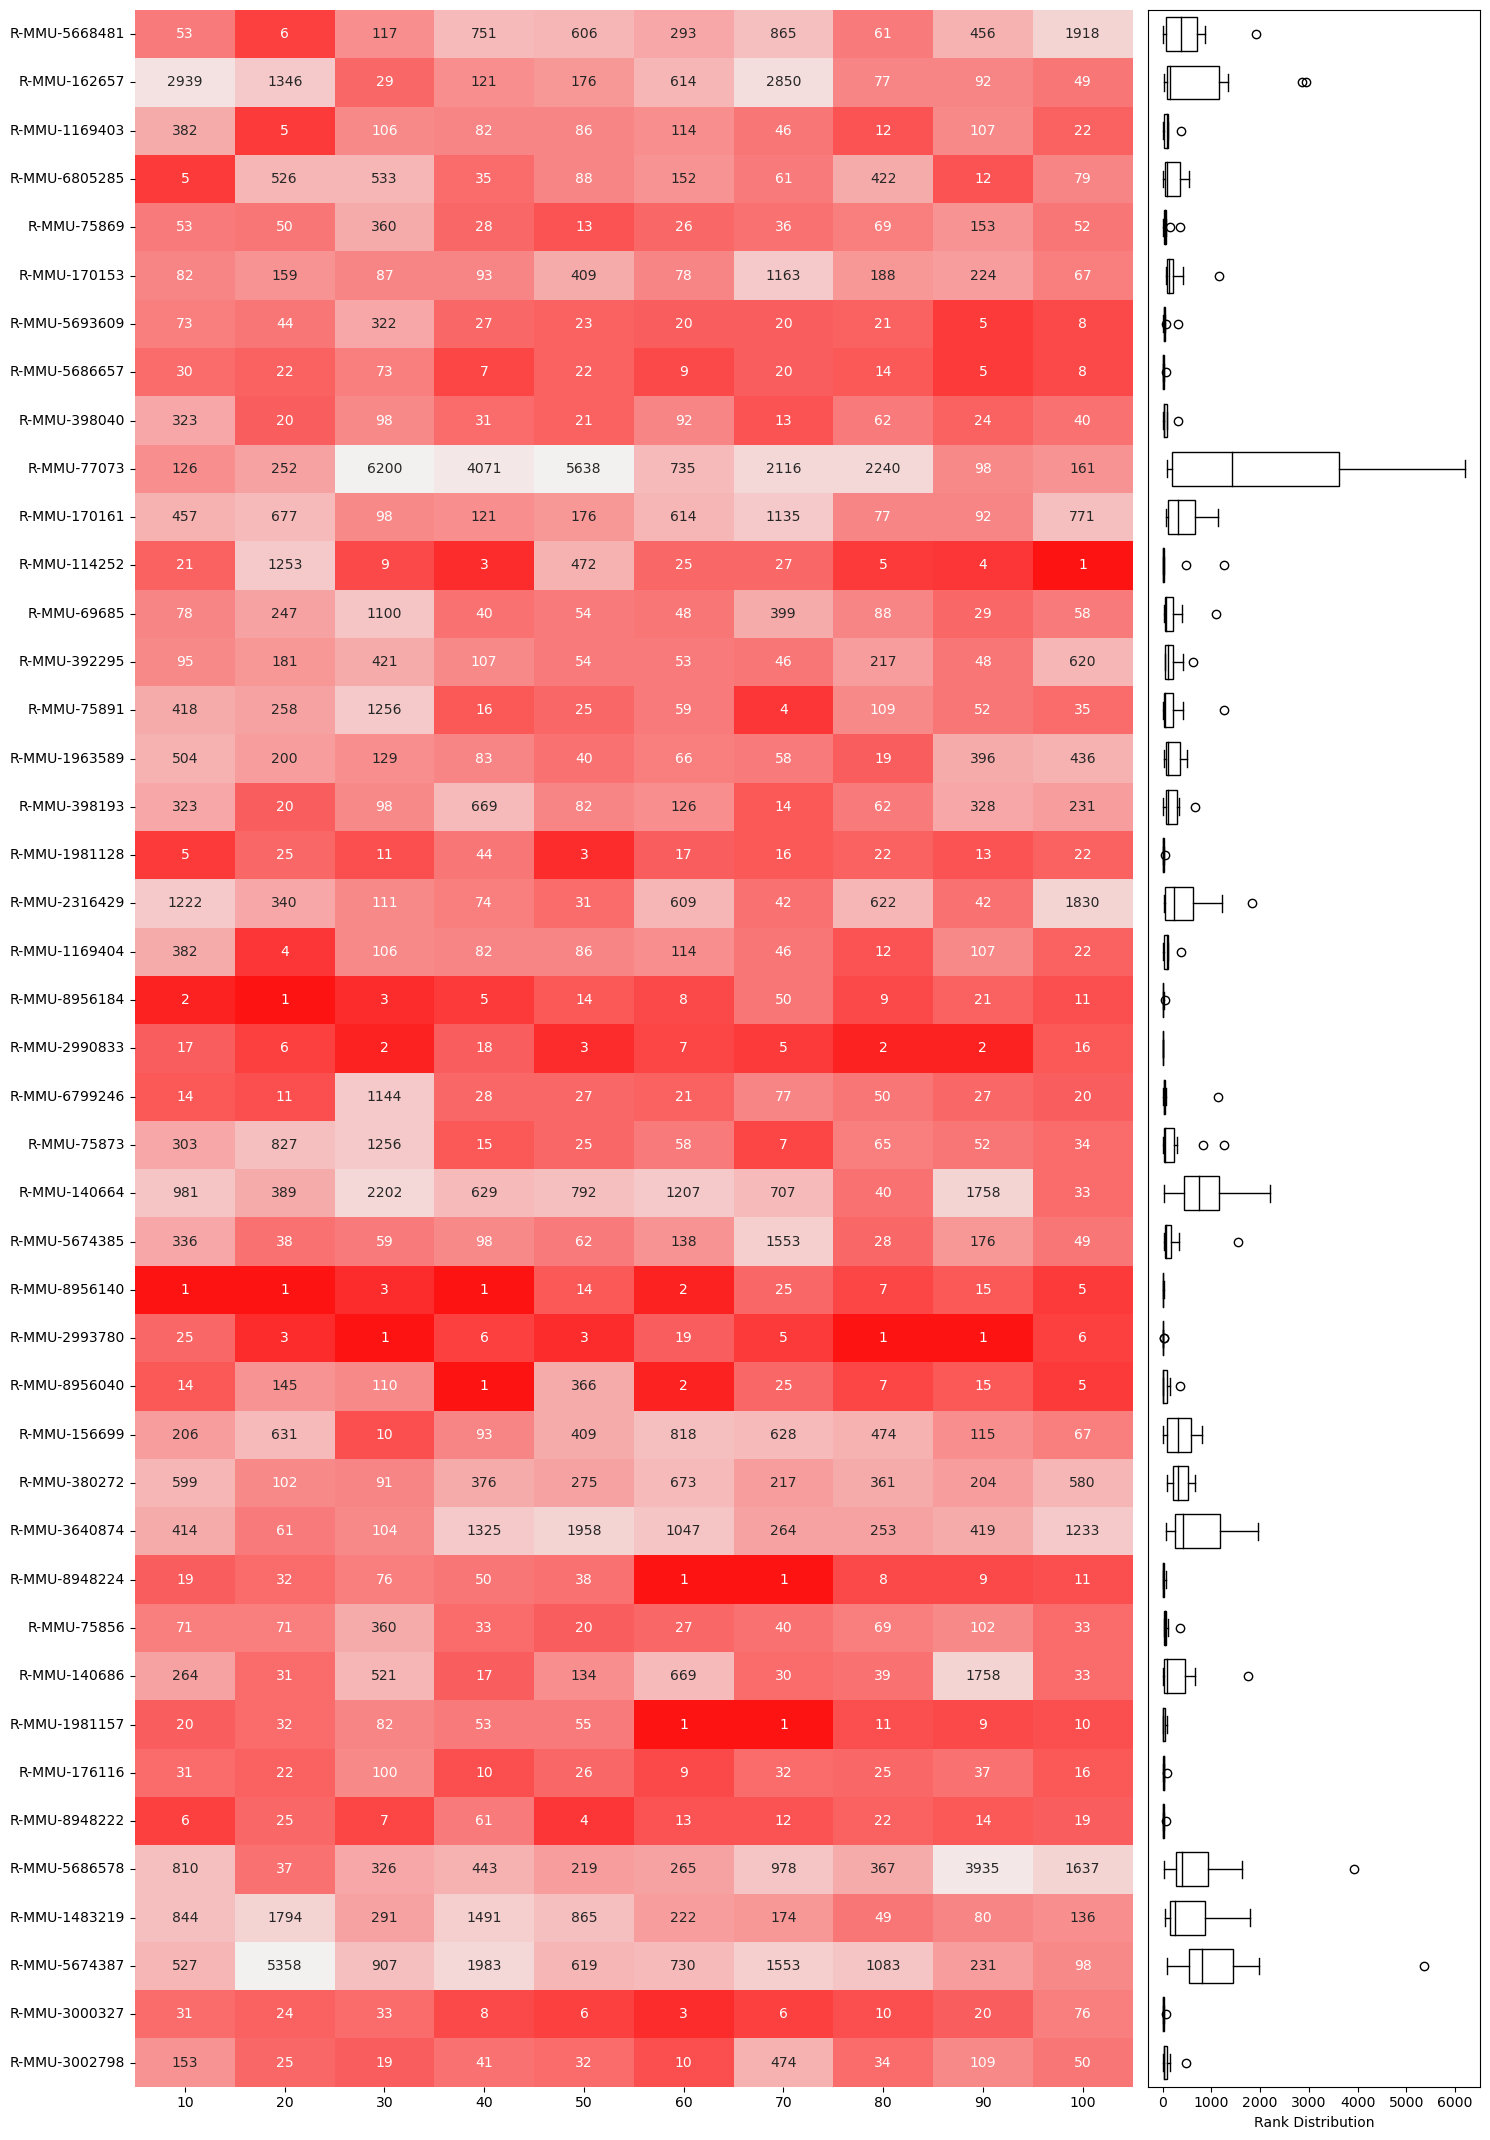

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

def get_top_10_reactions(df, centrality_type):
    return df.nlargest(10, centrality_type)[['Node', centrality_type]]

def analyze_reaction_overlap(folder_path, centrality_type, mode):
    datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
               'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
    
    all_top_reactions = {}
    all_data = {
        'graph_10': graph_10,
        'graph_20': graph_20,
        'graph_30': graph_30,
        'graph_40': graph_40,
        'graph_50': graph_50,
        'graph_60': graph_60,
        'graph_70': graph_70,
        'graph_80': graph_80,
        'graph_90': graph_90,
        'graph_100': graph_100
    }
    
    for dataset in datasets:
        file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
        df = pd.read_csv(file_path, sep=",")
        all_top_reactions[dataset] = get_top_10_reactions(df, centrality_type)
    
    unique_reactions = set()
    for df in all_top_reactions.values():
        unique_reactions.update(df['Node'].values)
    
    result_matrix = []
    for reaction in unique_reactions:
        row = []
        for dataset in datasets:
            if reaction in all_top_reactions[dataset]['Node'].values:
                rank = all_top_reactions[dataset][all_top_reactions[dataset]['Node'] == reaction].index[0] + 1
                row.append(rank)
            else:
                original_df = all_data[dataset]
                mask = (original_df['start'] == reaction) | (original_df['end'] == reaction)
                if mask.any():  
                    index = original_df[mask].index[0] + 1
                else:
                    index = -1  
                row.append(index)
        result_matrix.append(row)
    
    result_df = pd.DataFrame(result_matrix, 
                           index=list(unique_reactions), 
                           columns=[d.replace('graph_', '') for d in datasets])
    
    fig = plt.figure(figsize=(15, len(unique_reactions)*0.5))
    
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    ax_heat = plt.subplot(gs[0])
    result_df_display = result_df.copy()
    result_df_display = result_df_display.where(result_df_display <= 0, lambda x: np.log(x))
    max_val = result_df_display.max().max()
    
    colors = ['#FFFFFF']
    colors.extend(sns.light_palette("red", n_colors=50, as_cmap=False).as_hex()[::-1])
    
    sns.heatmap(result_df_display,
                cmap=colors,
                center=None,
                vmin=-1,
                vmax=max_val,
                annot=result_df,
                fmt='.0f',
                cbar=False,  
                yticklabels=True,
                annot_kws={'size': 10},
                ax=ax_heat)
    
    ax_box = plt.subplot(gs[1])
    positions = np.arange(len(result_df.index)) + 0.5 
    
    for i, (idx, row) in enumerate(result_df.iterrows()):
        valid_values = row[row != -1]
        if not valid_values.empty:
            bp = ax_box.boxplot(valid_values, 
                              positions=[positions[i]], 
                              vert=False,  
                              widths=0.7,
                              patch_artist=True,  
                              medianprops=dict(color="black"),  
                              boxprops=dict(facecolor="white", color="black"), 
                              whiskerprops=dict(color="black"), 
                              capprops=dict(color="black"))  
    
    ax_box.set_ylim(len(result_df.index), 0)  
    ax_box.set_yticks([])  
    ax_box.set_xlabel('Rank Distribution')
    
    plt.tight_layout()
    plt.show()

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'
for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
    for mode in ['Top_1%']:
        analyze_reaction_overlap(folder_path, centrality_type, mode)

In [7]:
import pandas as pd
import networkx as nx

def analyze_and_save_graph(graph_data, graph_name, output_folder):
    top_1_percent = lambda df: df.head(max(1, len(df)//100))
    top_100 = lambda df: df.head(100)

    def top_25_percent_sum(df):
        total_sum = df["ig_1"].sum()
        threshold = total_sum * 0.25
        df["ig_1"] = df["ig_1"].cumsum()
        return df[df["ig_1"] <= threshold]

    def get_top(df, percentage):
        if percentage == 0.01:
            return top_1_percent(df)
        elif percentage == 0.25:
            return top_25_percent_sum(df)
        elif percentage == 1.00:
            return top_100(df)

    # 计算中心性并保存结果
    def calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type):
        if centrality_type == 'Eigenvector':
            centrality = nx.eigenvector_centrality(G, max_iter=1000)
        elif centrality_type == 'Betweenness':
            centrality = nx.betweenness_centrality(G)
        elif centrality_type == 'Closeness':
            centrality = nx.closeness_centrality(G)
        
        df_centrality = pd.DataFrame({
            'Node': G.nodes(),
            centrality_type: [centrality[node] for node in G.nodes()]
        })

        df_centrality.to_csv(f"{output_folder}/{graph_name}_{mode}_{centrality_type}.csv", index=False)

    # 筛选并处理图
    for mode, percentage in [('Top_1%', 0.01)]:
        filtered_data = get_top(graph_data, percentage)
        G = nx.from_pandas_edgelist(filtered_data, 'start', 'end', create_using=nx.DiGraph())

        for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
            calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type)

# 示例用的图数据，每个图的 DataFrame
graphs = [graph_100_shuffled_reaction]
graph_names = ['graph_100_shuffled_reaction']
output_folder = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'

for graph, name in zip(graphs, graph_names):
    print(f'Analyzing and saving {name}')
    analyze_and_save_graph(graph, name, output_folder)


Analyzing and saving graph_100_shuffled_reaction



Analysis of reactions overlap:
Total unique reactions: 43
Reactions in shuffled top 10: 10
Number of overlapping reactions: 9

Overlapping reactions:
- R-MMU-8948224
- R-MMU-5693609
- R-MMU-1981128
- R-MMU-1981157
- R-MMU-8948222
- R-MMU-398040
- R-MMU-2993780
- R-MMU-2990833
- R-MMU-8956184

Reactions unique to shuffled top 10:
- R-MMU-186786


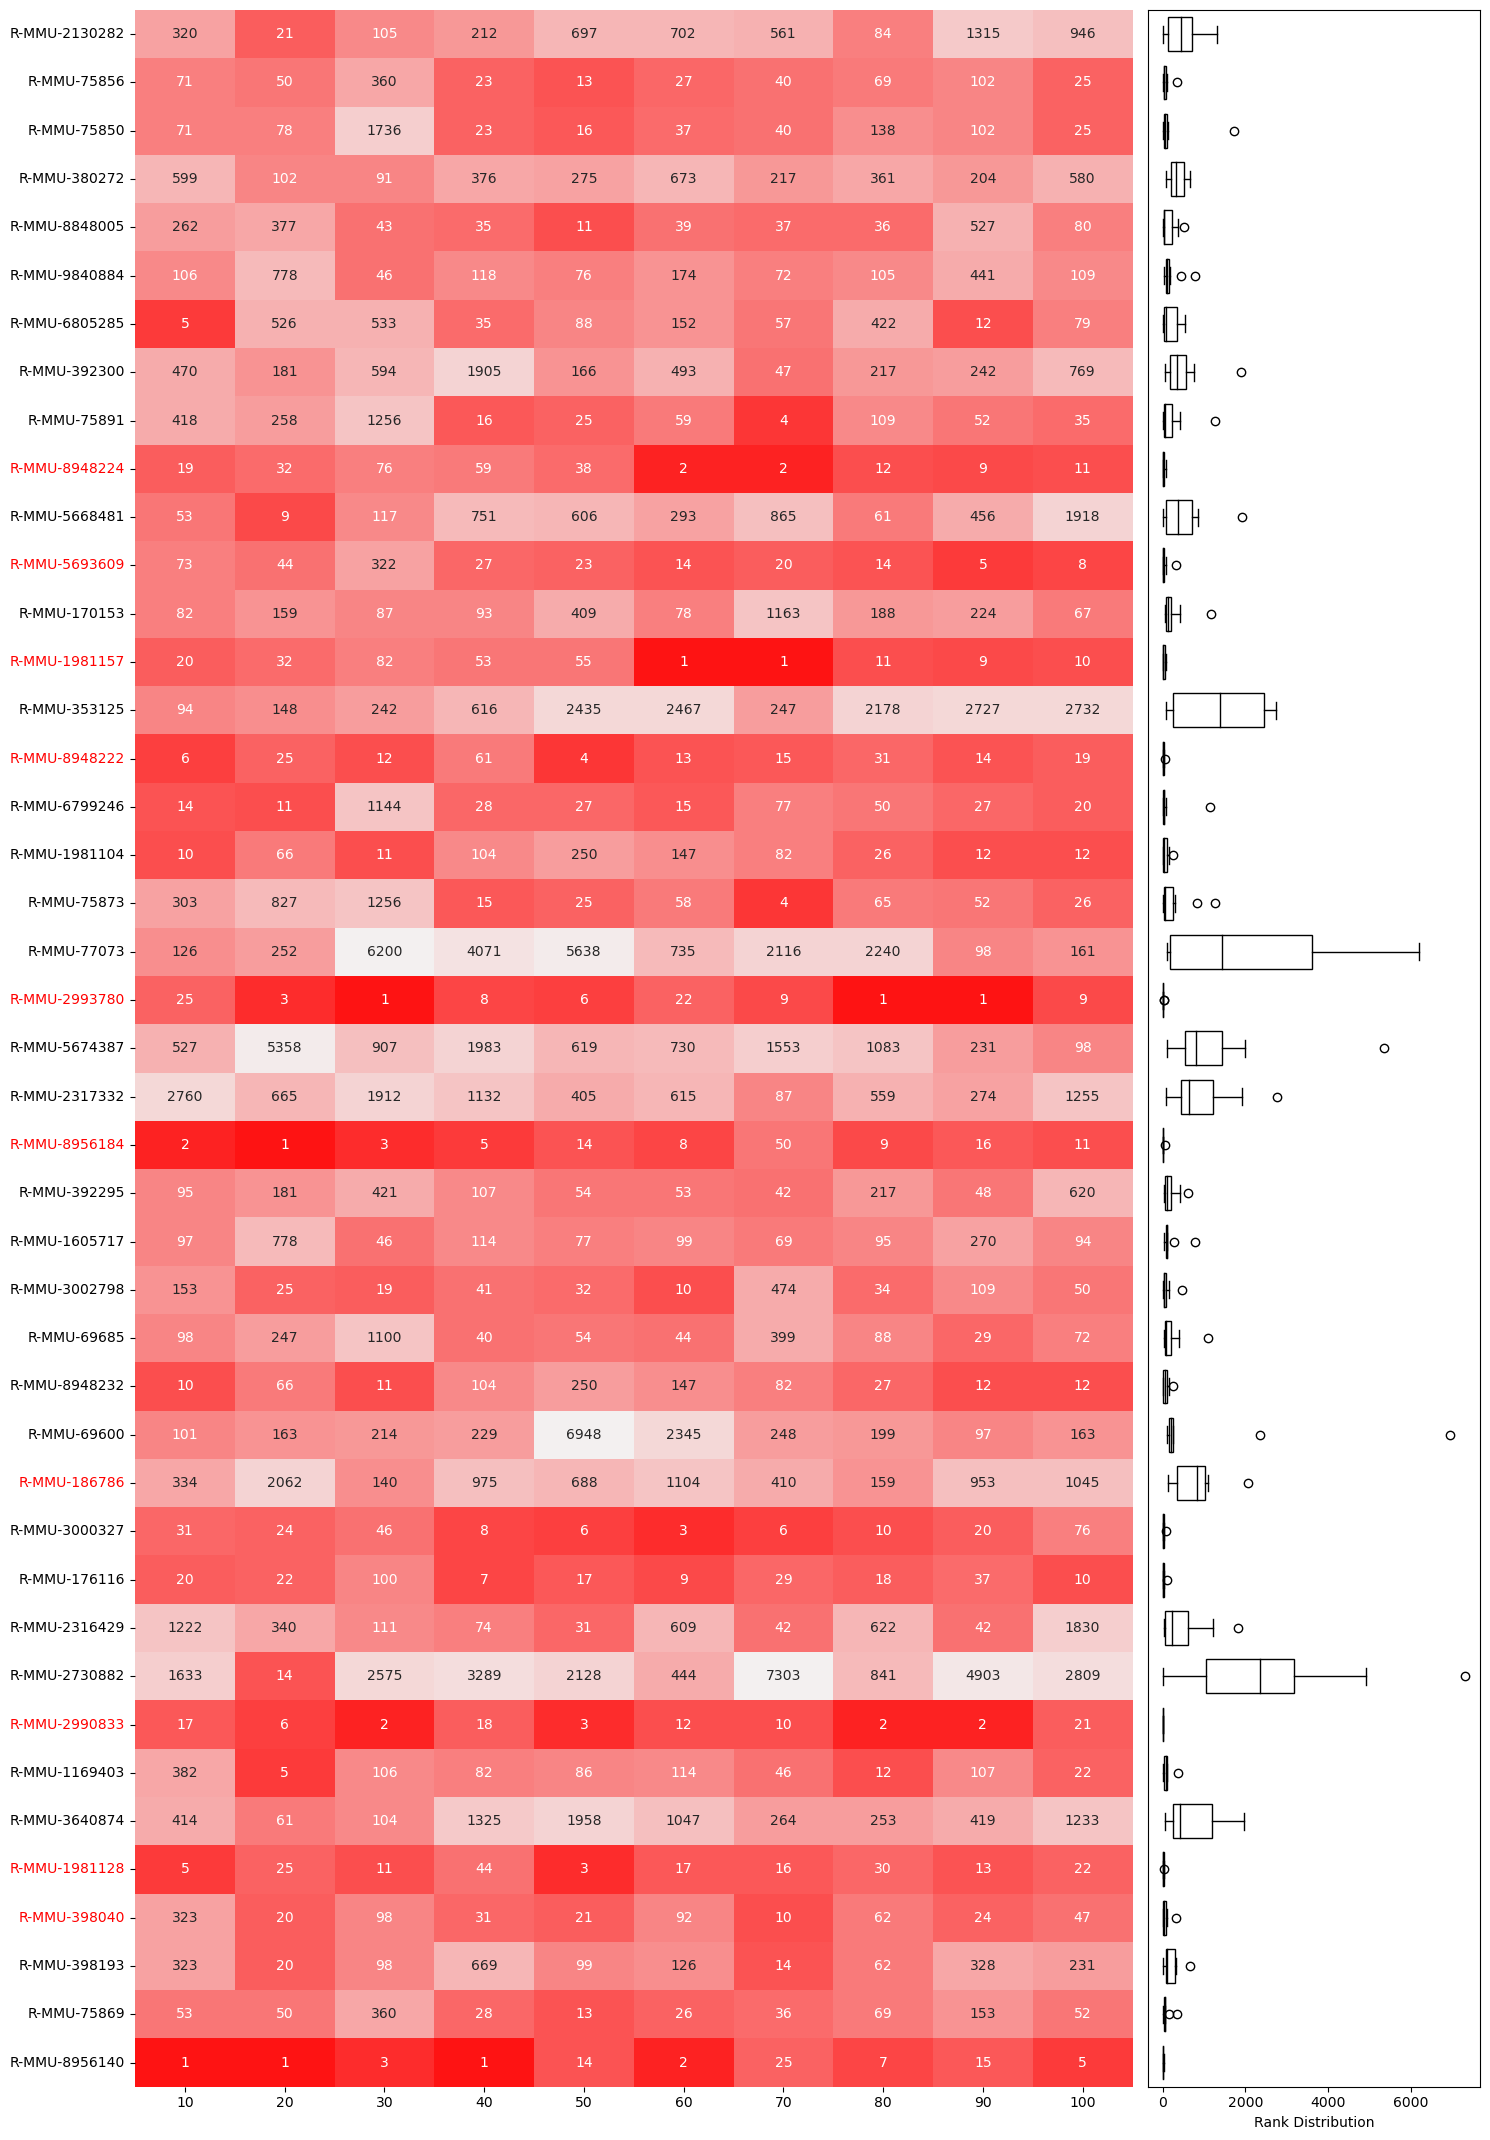


Total unique reactions in top 10 lists: 43

Reactions that appear in all datasets' top 10:

Analysis of reactions overlap:
Total unique reactions: 46
Reactions in shuffled top 10: 10
Number of overlapping reactions: 7

Overlapping reactions:
- R-MMU-8948224
- R-MMU-1981128
- R-MMU-5693599
- R-MMU-8847995
- R-MMU-5686685
- R-MMU-8956140
- R-MMU-380073

Reactions unique to shuffled top 10:
- R-MMU-749452
- R-MMU-8955289
- R-MMU-186773


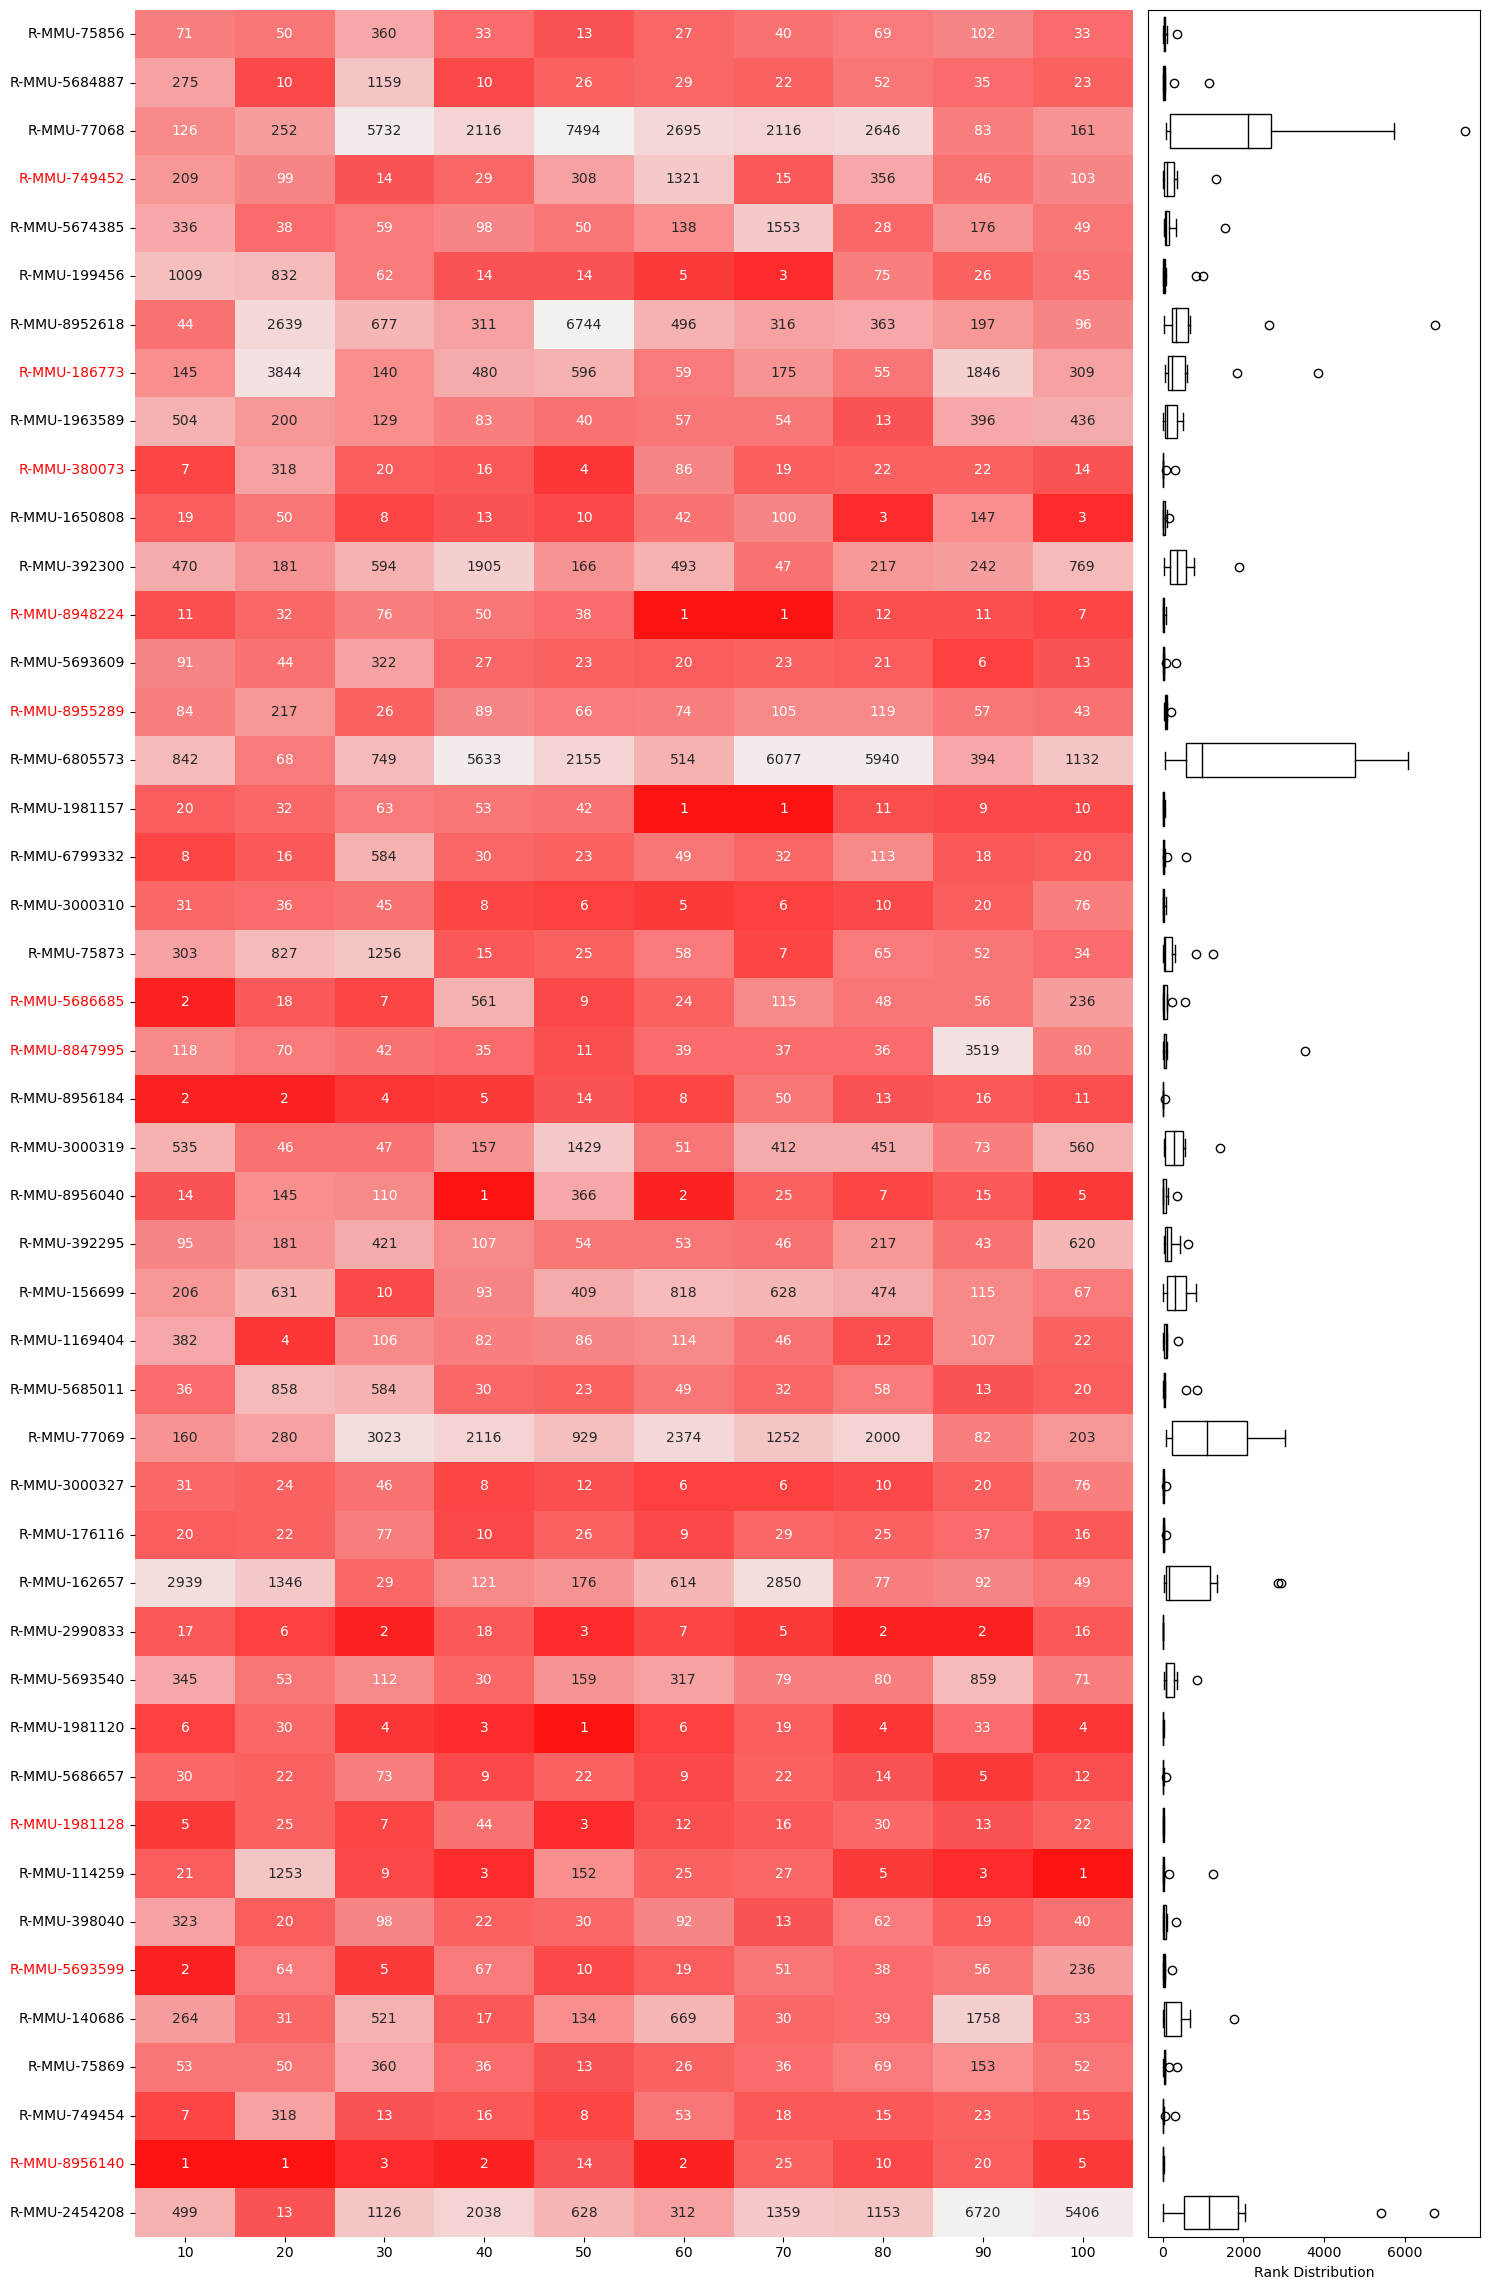


Total unique reactions in top 10 lists: 46

Reactions that appear in all datasets' top 10:

Analysis of reactions overlap:
Total unique reactions: 47
Reactions in shuffled top 10: 10
Number of overlapping reactions: 6

Overlapping reactions:
- R-MMU-5693609
- R-MMU-1981128
- R-MMU-8948222
- R-MMU-398040
- R-MMU-8956140
- R-MMU-2990833

Reactions unique to shuffled top 10:
- R-MMU-186786
- R-MMU-8853762
- R-MMU-8847995
- R-MMU-186773


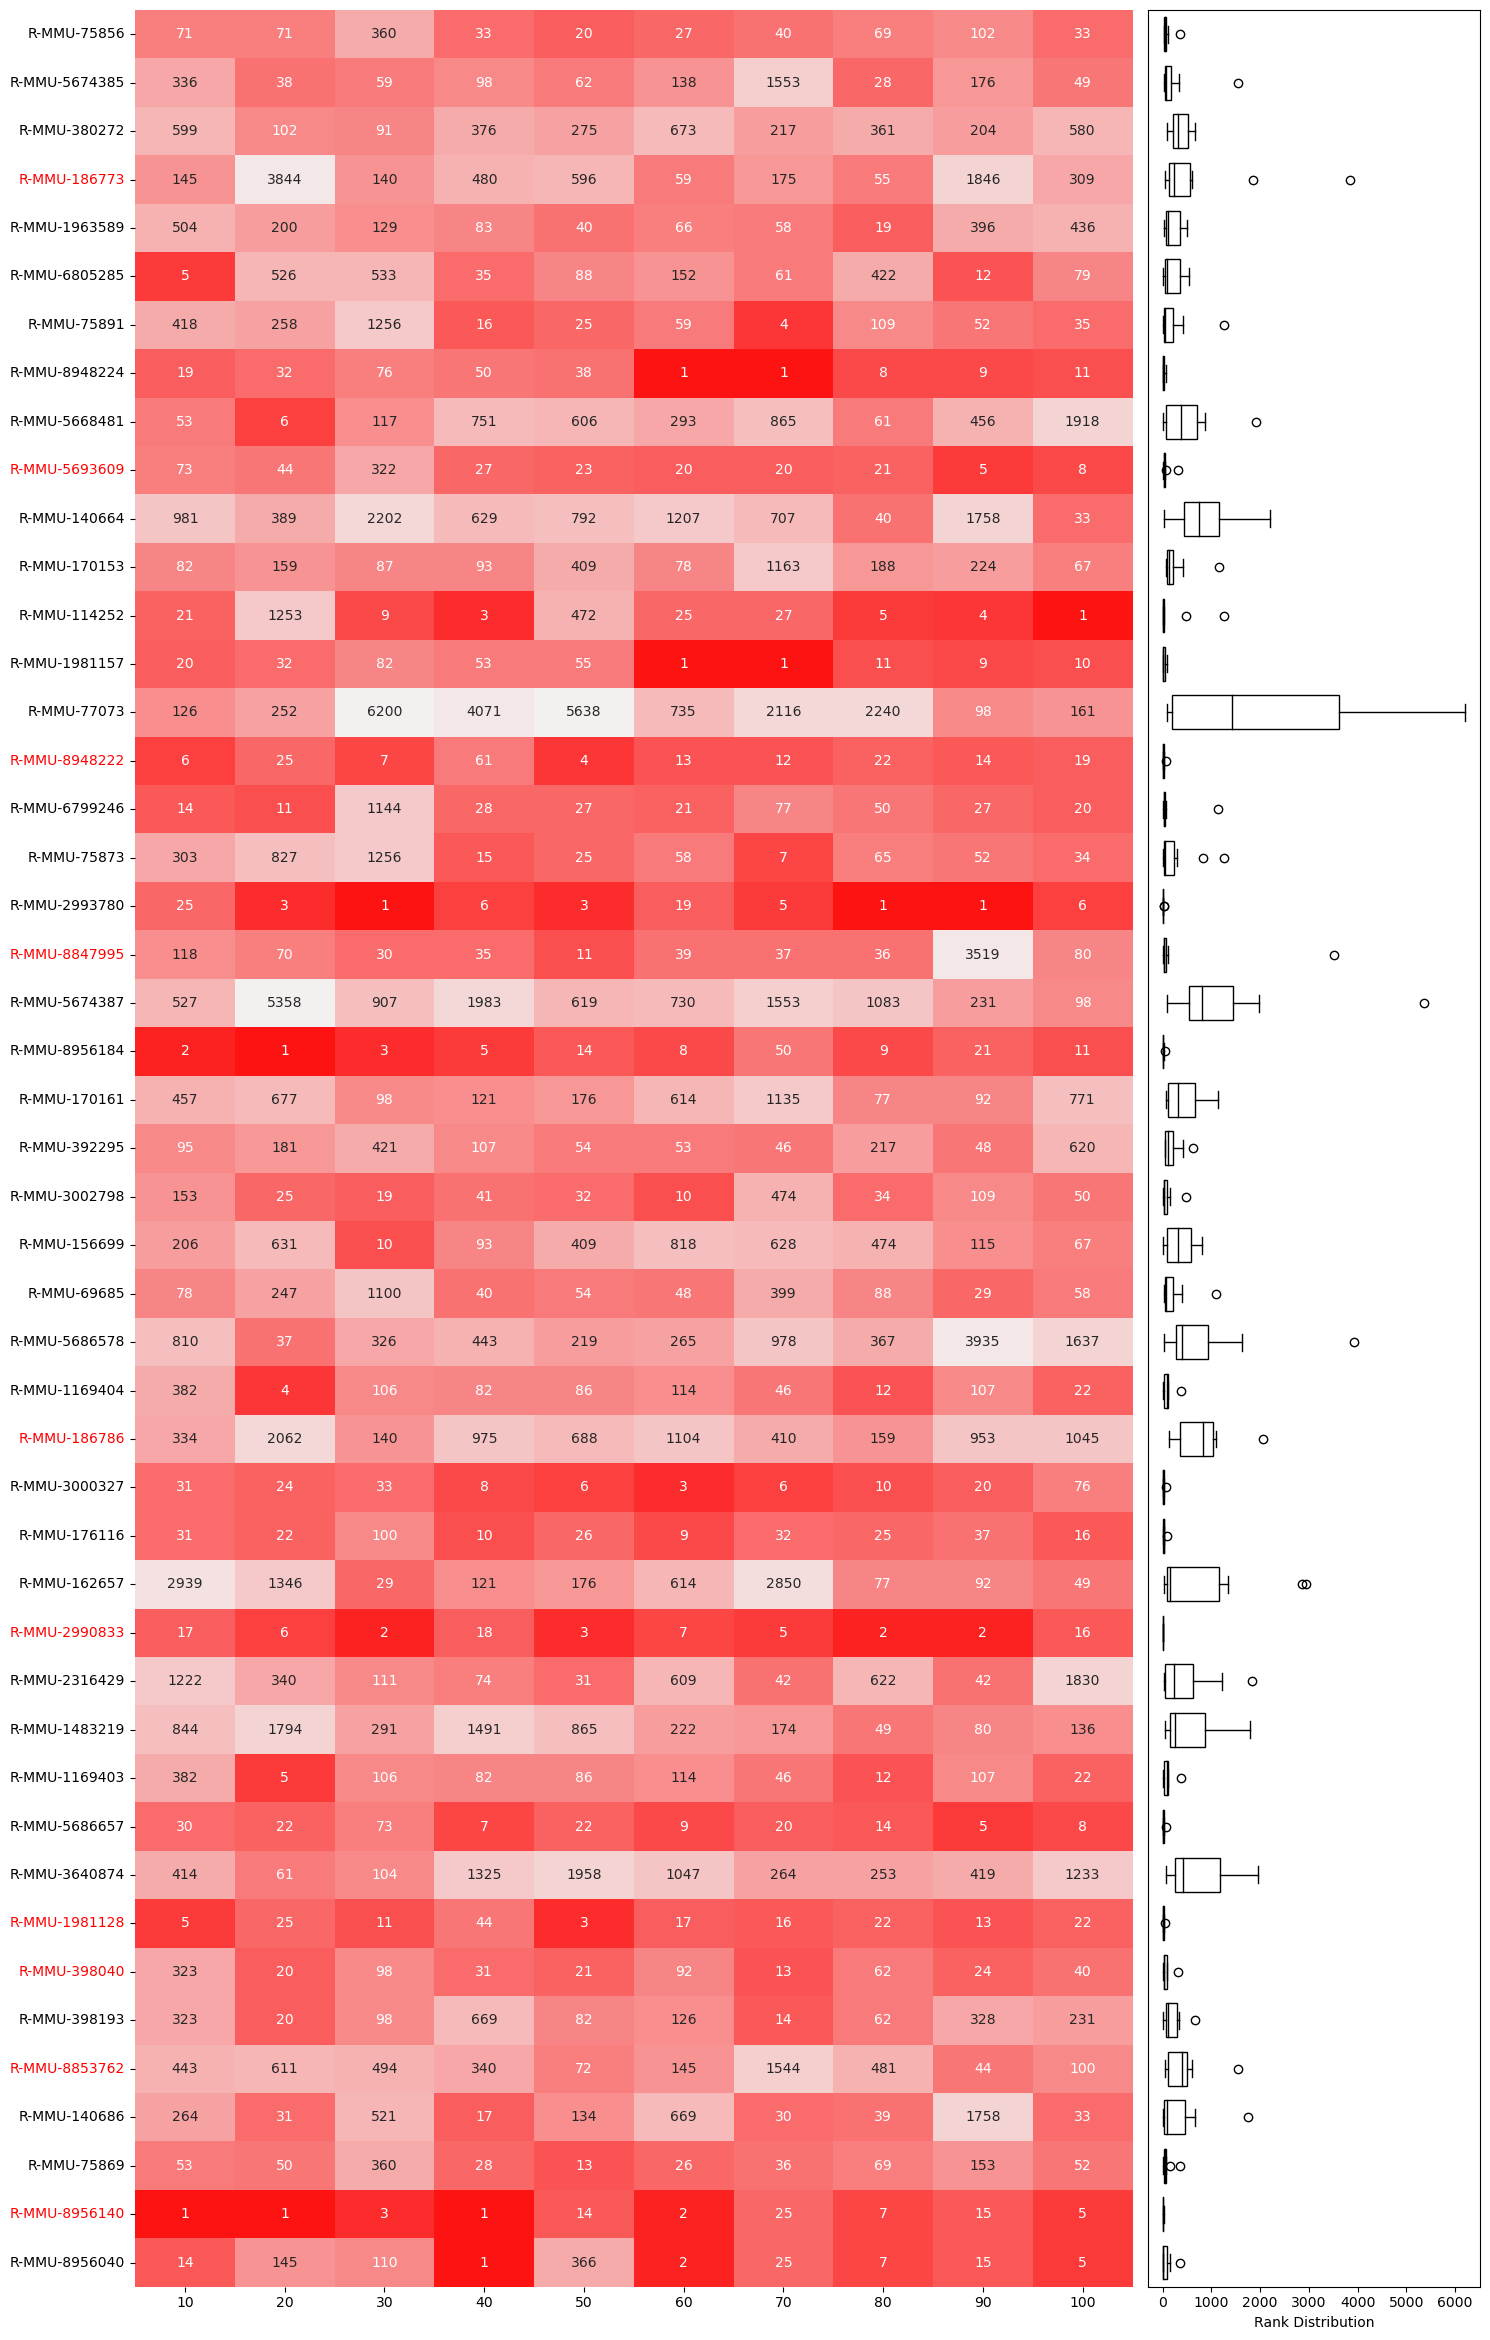


Total unique reactions in top 10 lists: 47

Reactions that appear in all datasets' top 10:


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

def get_top_10_reactions(df, centrality_type):
  return df.nlargest(10, centrality_type)[['Node', centrality_type]]

def analyze_reaction_overlap(folder_path, centrality_type, mode):
  datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
             'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
  
  all_data = {
      'graph_10': graph_10,
      'graph_20': graph_20,
      'graph_30': graph_30,
      'graph_40': graph_40,
      'graph_50': graph_50,
      'graph_60': graph_60,
      'graph_70': graph_70,
      'graph_80': graph_80,
      'graph_90': graph_90,
      'graph_100': graph_100,
      'graph_100_shuffled_reaction': graph_100_shuffled_reaction
  }
  
  # 只获取原始数据集的top 10 reactions
  original_top_reactions = set()
  all_top_reactions = {}
  for dataset in datasets:
      file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
      df = pd.read_csv(file_path, sep=",")
      all_top_reactions[dataset] = get_top_10_reactions(df, centrality_type)
      original_top_reactions.update(all_top_reactions[dataset]['Node'].values)
  
  # 单独获取shuffled数据集的top 10
  shuffled_file_path = f"{folder_path}/graph_100_shuffled_reaction_{mode}_{centrality_type}.csv"
  shuffled_df = pd.read_csv(shuffled_file_path, sep=",")
  all_top_reactions['graph_100_shuffled_reaction'] = get_top_10_reactions(shuffled_df, centrality_type)
  shuffled_top10 = set(all_top_reactions['graph_100_shuffled_reaction']['Node'].values)
  
  # 获取所有unique reactions（不使用update，而是使用union）
  unique_reactions = original_top_reactions.union(shuffled_top10)
  
  result_matrix = []
  for reaction in unique_reactions:
      row = []
      # 处理原始数据集
      for dataset in datasets:
          if reaction in all_top_reactions[dataset]['Node'].values:
              rank = all_top_reactions[dataset][all_top_reactions[dataset]['Node'] == reaction].index[0] + 1
              row.append(rank)
          else:
              original_df = all_data[dataset]
              mask = (original_df['start'] == reaction) | (original_df['end'] == reaction)
              if mask.any():  
                  index = original_df[mask].index[0] + 1
              else:
                  index = -1  
              row.append(index)
      result_matrix.append(row)
  
  result_df = pd.DataFrame(result_matrix, 
                         index=list(unique_reactions), 
                         columns=[d.replace('graph_', '') for d in datasets])
   
  print("\nAnalysis of reactions overlap:")
  print(f"Total unique reactions: {len(unique_reactions)}")
  print(f"Reactions in shuffled top 10: {len(shuffled_top10)}")
  overlapping_reactions = shuffled_top10.intersection(original_top_reactions)
  print(f"Number of overlapping reactions: {len(overlapping_reactions)}") 
  print("\nOverlapping reactions:")
  for reaction in overlapping_reactions:
       print(f"- {reaction}")

  print("\nReactions unique to shuffled top 10:")
  unique_to_shuffled = shuffled_top10 - original_top_reactions
  for reaction in unique_to_shuffled:
       print(f"- {reaction}")
  
  fig = plt.figure(figsize=(15, len(unique_reactions)*0.5))
  gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
  
  # 热图
  ax_heat = plt.subplot(gs[0])
  result_df_display = result_df.copy()
  result_df_display = result_df_display.where(result_df_display <= 0, lambda x: np.log(x))
  max_val = result_df_display.max().max()
  
  colors = ['#FFFFFF']
  colors.extend(sns.light_palette("red", n_colors=50, as_cmap=False).as_hex()[::-1])
  
  # 绘制热图
  hm = sns.heatmap(result_df_display,
                   cmap=colors,
                   center=None,
                   vmin=-1,
                   vmax=max_val,
                   annot=result_df,
                   fmt='.0f',
                   cbar=False,
                   yticklabels=True,
                   annot_kws={'size': 10},
                   ax=ax_heat)
  
  # 修改标签颜色
  for tick in ax_heat.yaxis.get_ticklabels():
      if tick.get_text() in shuffled_top10:
          tick.set_color('red')
  
  # 箱型图
  ax_box = plt.subplot(gs[1])
  positions = np.arange(len(result_df.index)) + 0.5
  
  for i, (idx, row) in enumerate(result_df.iterrows()):
      valid_values = row[row != -1]
      if not valid_values.empty:
          bp = ax_box.boxplot(valid_values, 
                            positions=[positions[i]], 
                            vert=False,
                            widths=0.7,
                            patch_artist=True,
                            medianprops=dict(color="black"),
                            boxprops=dict(facecolor="white", color="black"),
                            whiskerprops=dict(color="black"),
                            capprops=dict(color="black"))
  
  ax_box.set_ylim(len(result_df.index), 0)
  ax_box.set_yticks([])
  ax_box.set_xlabel('Rank Distribution')
  
  plt.tight_layout()
  plt.show()
  
  print(f"\nTotal unique reactions in top 10 lists: {len(unique_reactions)}")
  print("\nReactions that appear in all datasets' top 10:")
  common_reactions = result_df[(result_df <= 10) & (result_df > 0)].dropna(how='any').index
  for reaction in common_reactions:
      print(f"- {reaction}")

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'
for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
  for mode in ['Top_1%']:
      analyze_reaction_overlap(folder_path, centrality_type, mode)

In [118]:
print(graph_100_shuffled_reaction)

          ig_0          ig_1          start            end
0     0.407999  1.000000e+00   R-MMU-114259   R-MMU-114252
1     0.407999  1.000000e+00   R-MMU-114259   R-MMU-114252
2     1.000000  9.290113e-01  R-MMU-1981157  R-MMU-8948224
3     0.480665  9.236477e-01  R-MMU-2002460  R-MMU-1650808
4     0.377498  6.391775e-01   R-MMU-380073   R-MMU-749454
...        ...           ...            ...            ...
8551  0.000178  7.539656e-06   R-MMU-398184   R-MMU-419166
8552  0.003644  7.318310e-06   R-MMU-199456  R-MMU-1855177
8553  0.003201  7.308759e-06   R-MMU-382053   R-MMU-382057
8554  0.003283  4.741229e-06  R-MMU-2161951  R-MMU-2161907
8555  0.000460  6.571520e-07   R-MMU-975139   R-MMU-975139

[8556 rows x 4 columns]


In [119]:
print(graph_100)

          ig_0      ig_1          start            end
0     0.614707  1.000000   R-MMU-114259   R-MMU-114252
1     0.614707  1.000000   R-MMU-114259   R-MMU-114252
2     0.679466  0.788638  R-MMU-2002460  R-MMU-1650808
3     0.361705  0.661967  R-MMU-1981120  R-MMU-8948231
4     0.240194  0.641409  R-MMU-8956040  R-MMU-8956140
...        ...       ...            ...            ...
8551  0.001952  0.000011  R-MMU-3249390  R-MMU-3249371
8552  0.001952  0.000011  R-MMU-3249390  R-MMU-3249371
8553  0.003027  0.000010  R-MMU-1236398  R-MMU-1977958
8554  0.016466  0.000007  R-MMU-8867041  R-MMU-8867047
8555  0.003435  0.000003   R-MMU-158311   R-MMU-158399

[8556 rows x 4 columns]


In [ ]:
import pandas as pd
import networkx as nx

def analyze_and_save_graph(graph_data, graph_name, output_folder):
    top_1_percent = lambda df: df.head(max(1, len(df)//100))
    top_100 = lambda df: df.head(100)

    def top_25_percent_sum(df):
        total_sum = df["ig_0"].sum()
        threshold = total_sum * 0.25
        df["ig_0"] = df["ig_0"].cumsum()
        return df[df["ig_0"] <= threshold]

    def get_top(df, percentage):
        if percentage == 0.01:
            return top_1_percent(df)
        elif percentage == 0.25:
            return top_25_percent_sum(df)
        elif percentage == 1.00:
            return top_100(df)

    def calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type):
        if centrality_type == 'Eigenvector':
            centrality = nx.eigenvector_centrality(G, max_iter=1000)
        elif centrality_type == 'Betweenness':
            centrality = nx.betweenness_centrality(G)
        elif centrality_type == 'Closeness':
            centrality = nx.closeness_centrality(G)
        
        df_centrality = pd.DataFrame({
            'Node': G.nodes(),
            centrality_type: [centrality[node] for node in G.nodes()]
        })

        df_centrality.to_csv(f"{output_folder}/{graph_name}_{mode}_{centrality_type}.csv", index=False)

    for mode, percentage in [('Top_1%', 0.01)]:
        filtered_data = get_top(graph_data, percentage)
        G = nx.from_pandas_edgelist(filtered_data, 'start', 'end', create_using=nx.DiGraph())

        for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
            calculate_and_save_centrality(G, mode, output_folder, graph_name, centrality_type)

graphs = [graph_tcga]
graph_names = ['graph_tcga']
output_folder = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcga/output/'

for graph, name in zip(graphs, graph_names):
    print(f'Analyzing and saving {name}')
    analyze_and_save_graph(graph, name, output_folder)


Analyzing and saving graph_tcga



Analysis of reactions overlap:
Total unique reactions: 48
Reactions in TCGA top 10: 10
Number of overlapping reactions: 4

Overlapping reactions:
- R-MMU-2316429
- R-MMU-3000327
- R-MMU-2993780
- R-MMU-170153

Reactions unique to TCGA top 10:
- R-MMU-141439
- R-MMU-1963586
- R-MMU-5626227
- R-MMU-141422
- R-MMU-114252
- R-MMU-2316434


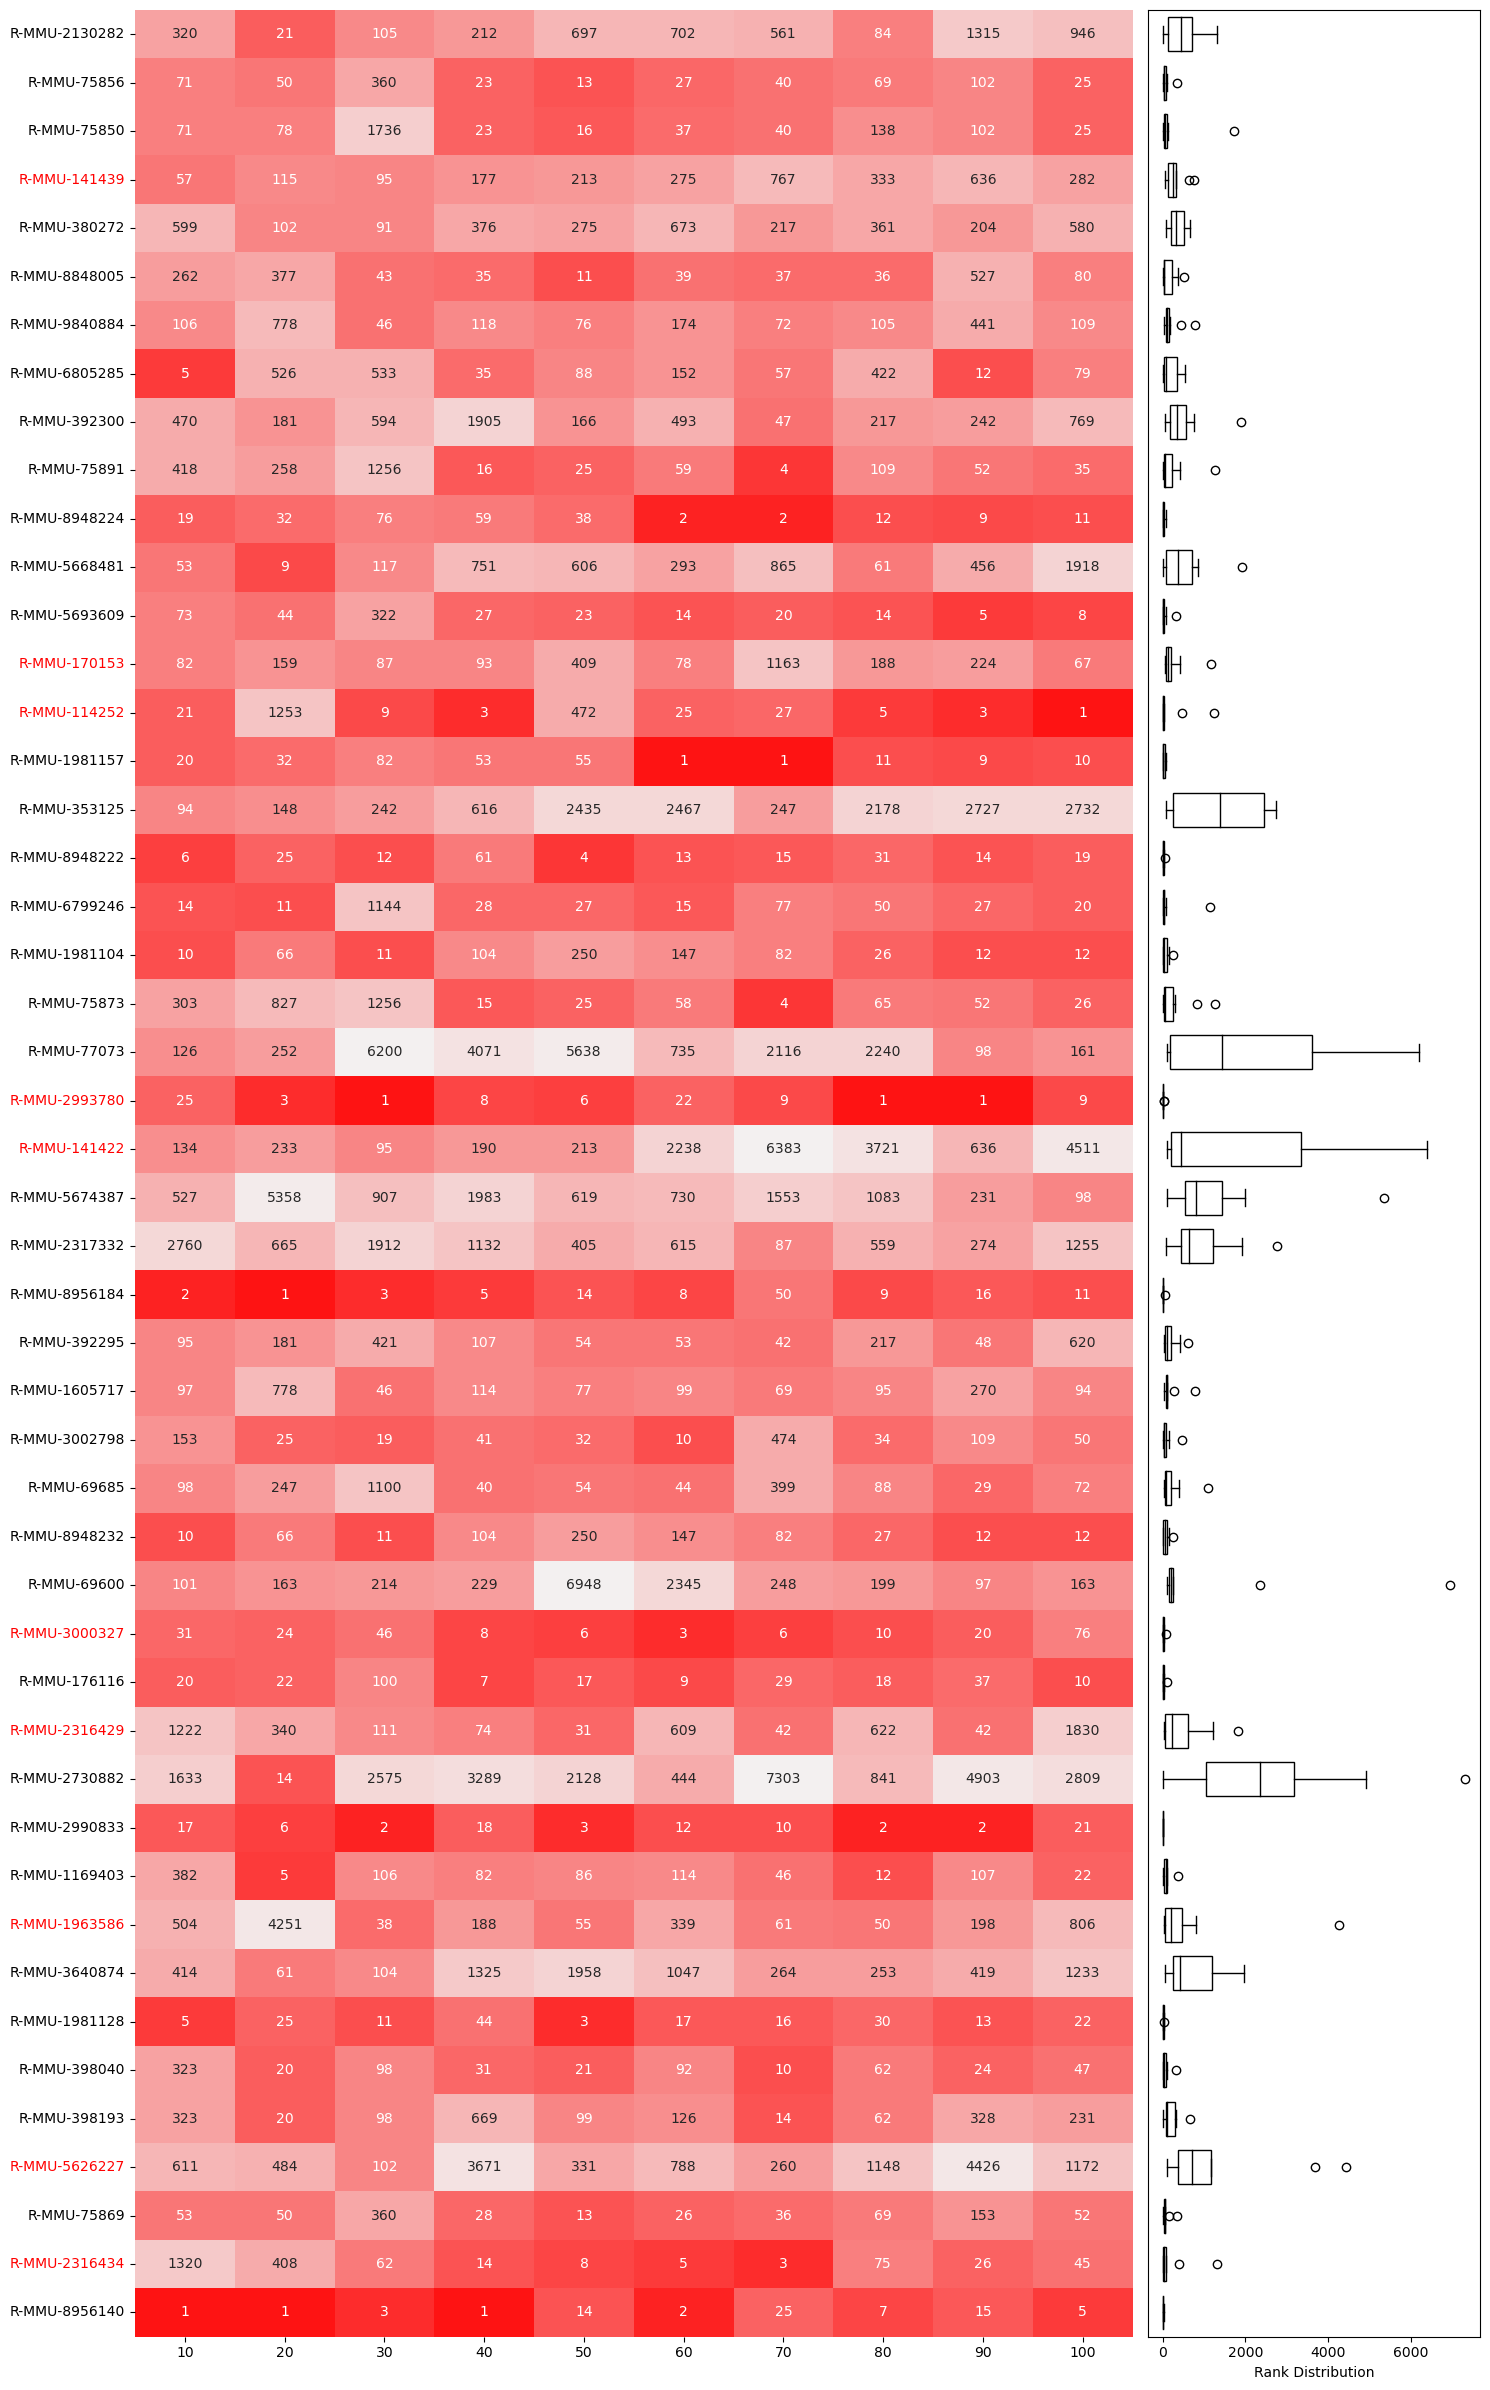


Total unique reactions in top 10 lists: 48

Reactions that appear in all datasets' top 10:

Analysis of reactions overlap:
Total unique reactions: 50
Reactions in TCGA top 10: 10
Number of overlapping reactions: 3

Overlapping reactions:
- R-MMU-114259
- R-MMU-3000310
- R-MMU-1963589

Reactions unique to TCGA top 10:
- R-MMU-5626228
- R-MMU-170159
- R-MMU-141422
- R-MMU-5626699
- R-MMU-141431
- R-MMU-1250353
- R-MMU-2316434


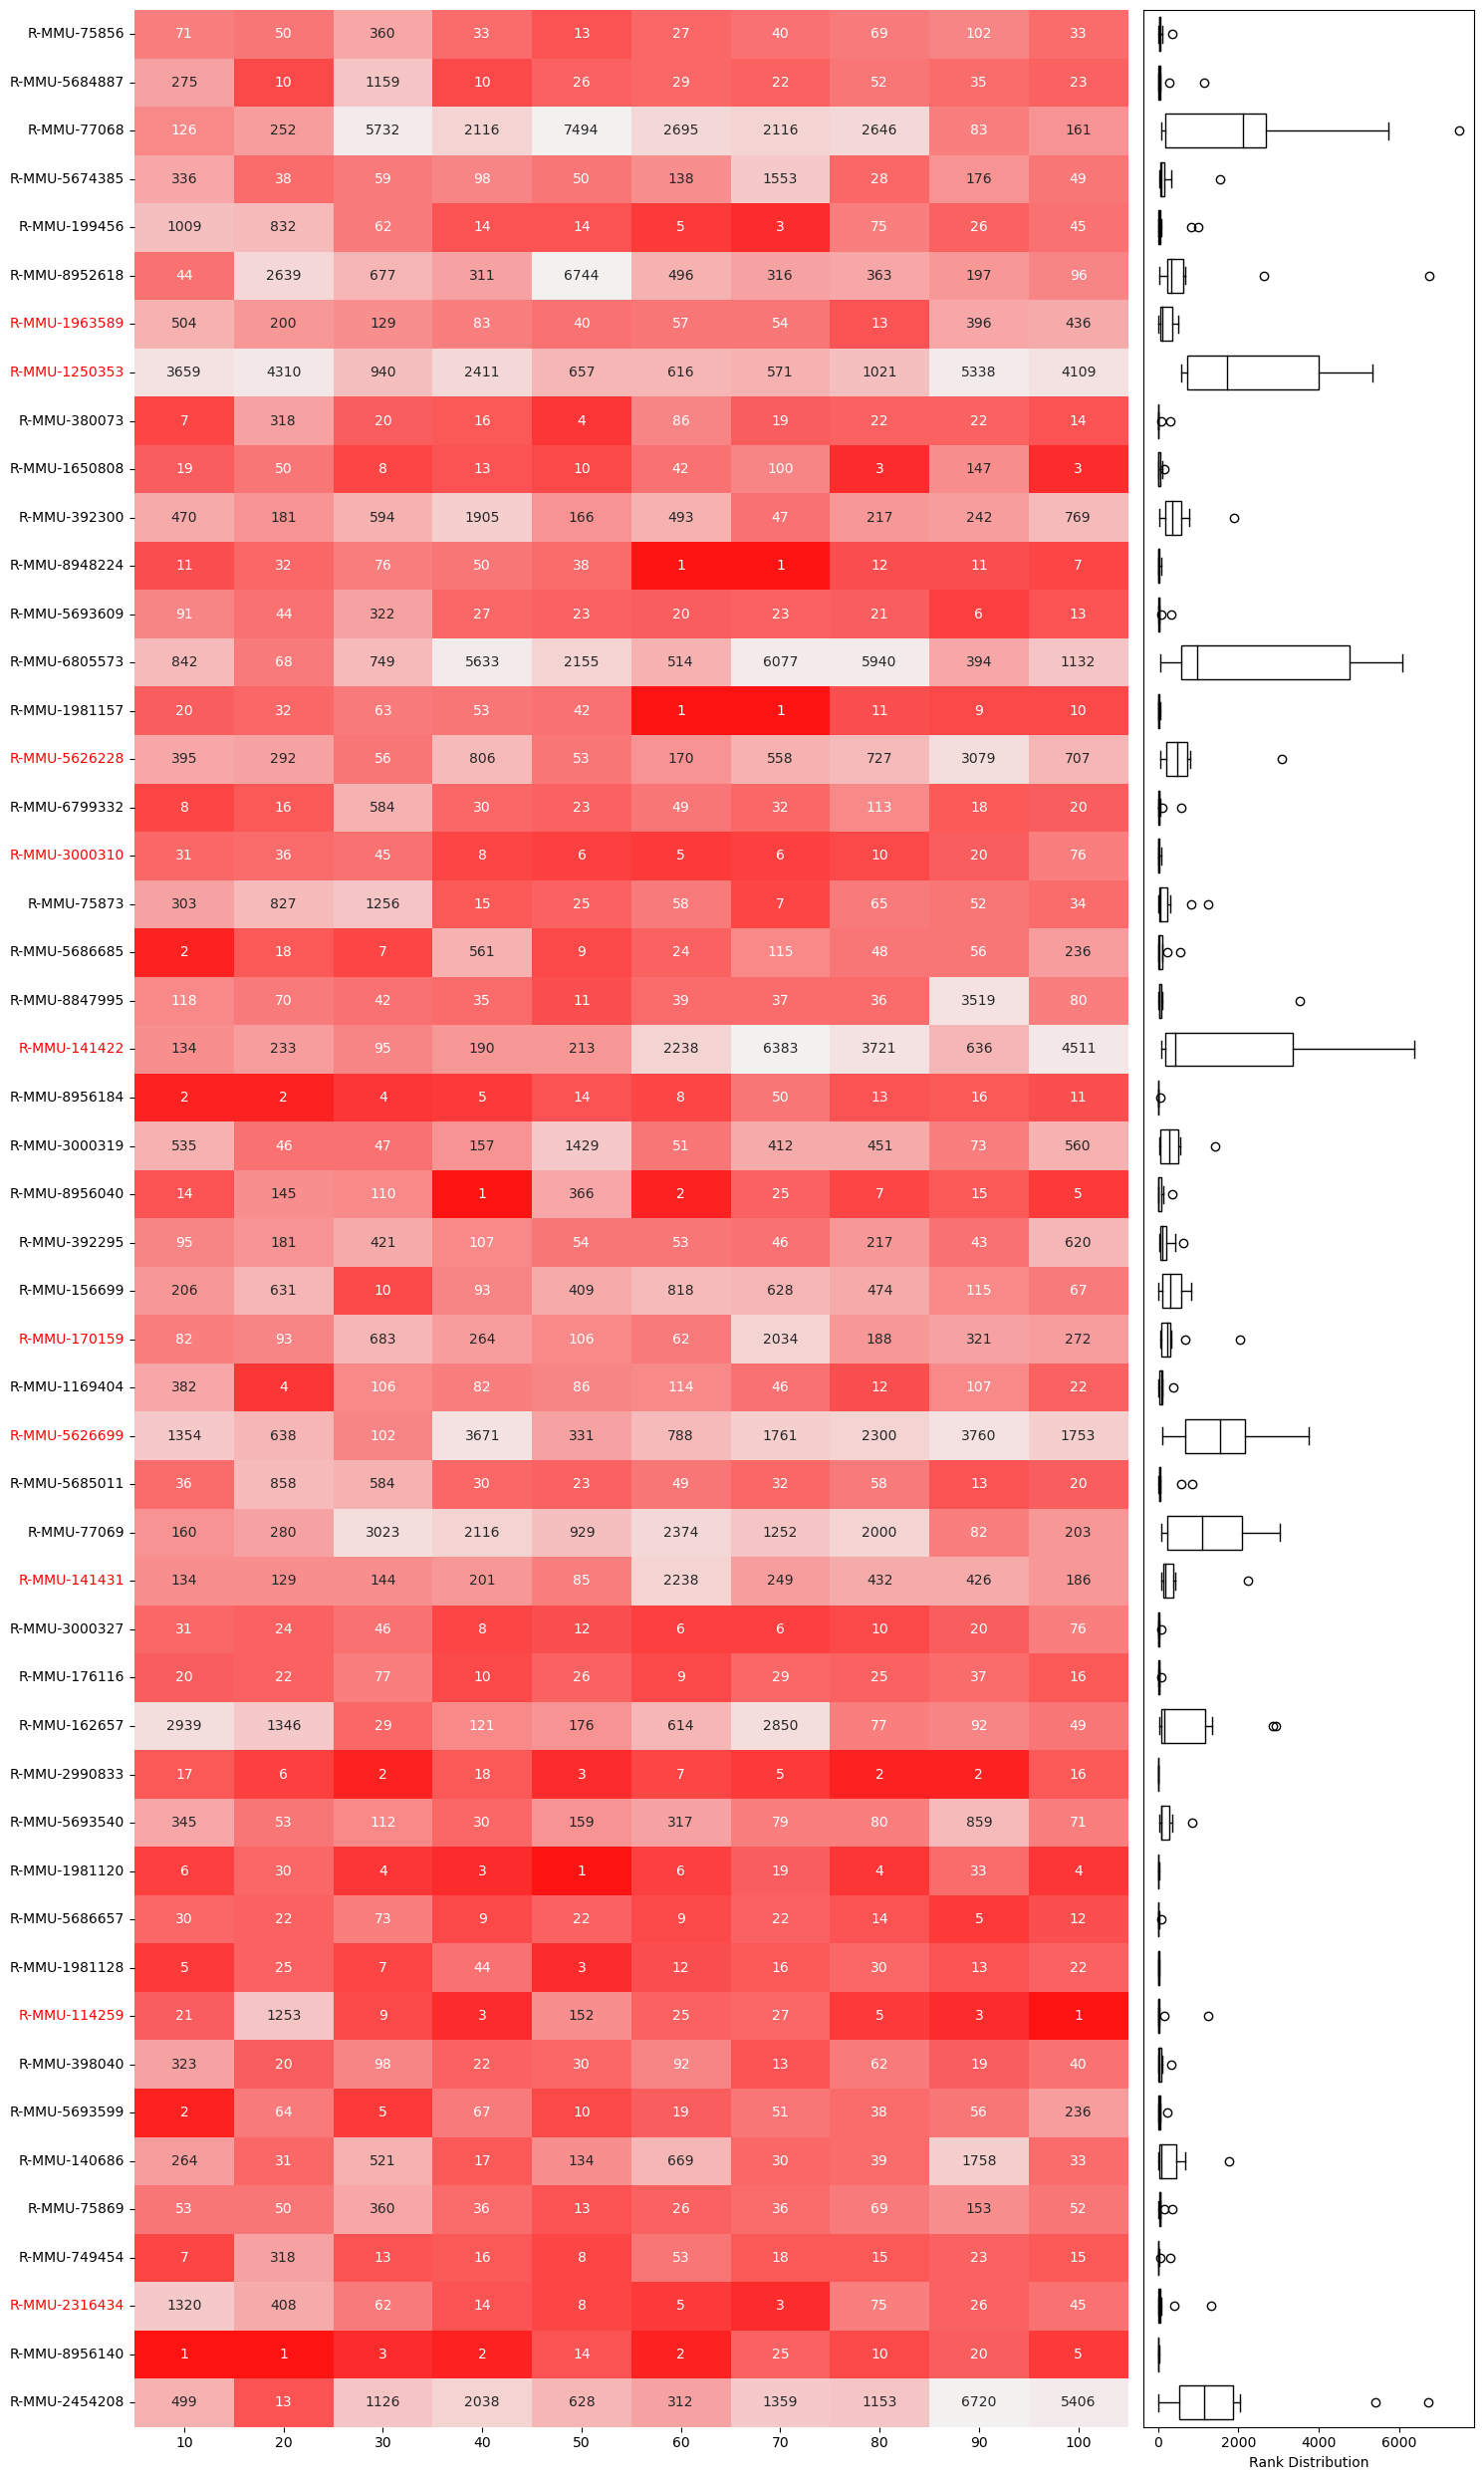


Total unique reactions in top 10 lists: 50

Reactions that appear in all datasets' top 10:

Analysis of reactions overlap:
Total unique reactions: 48
Reactions in TCGA top 10: 10
Number of overlapping reactions: 5

Overlapping reactions:
- R-MMU-3000327
- R-MMU-1963589
- R-MMU-114252
- R-MMU-2316429
- R-MMU-176116

Reactions unique to TCGA top 10:
- R-MMU-141439
- R-MMU-1963586
- R-MMU-5626227
- R-MMU-141422
- R-MMU-2316434


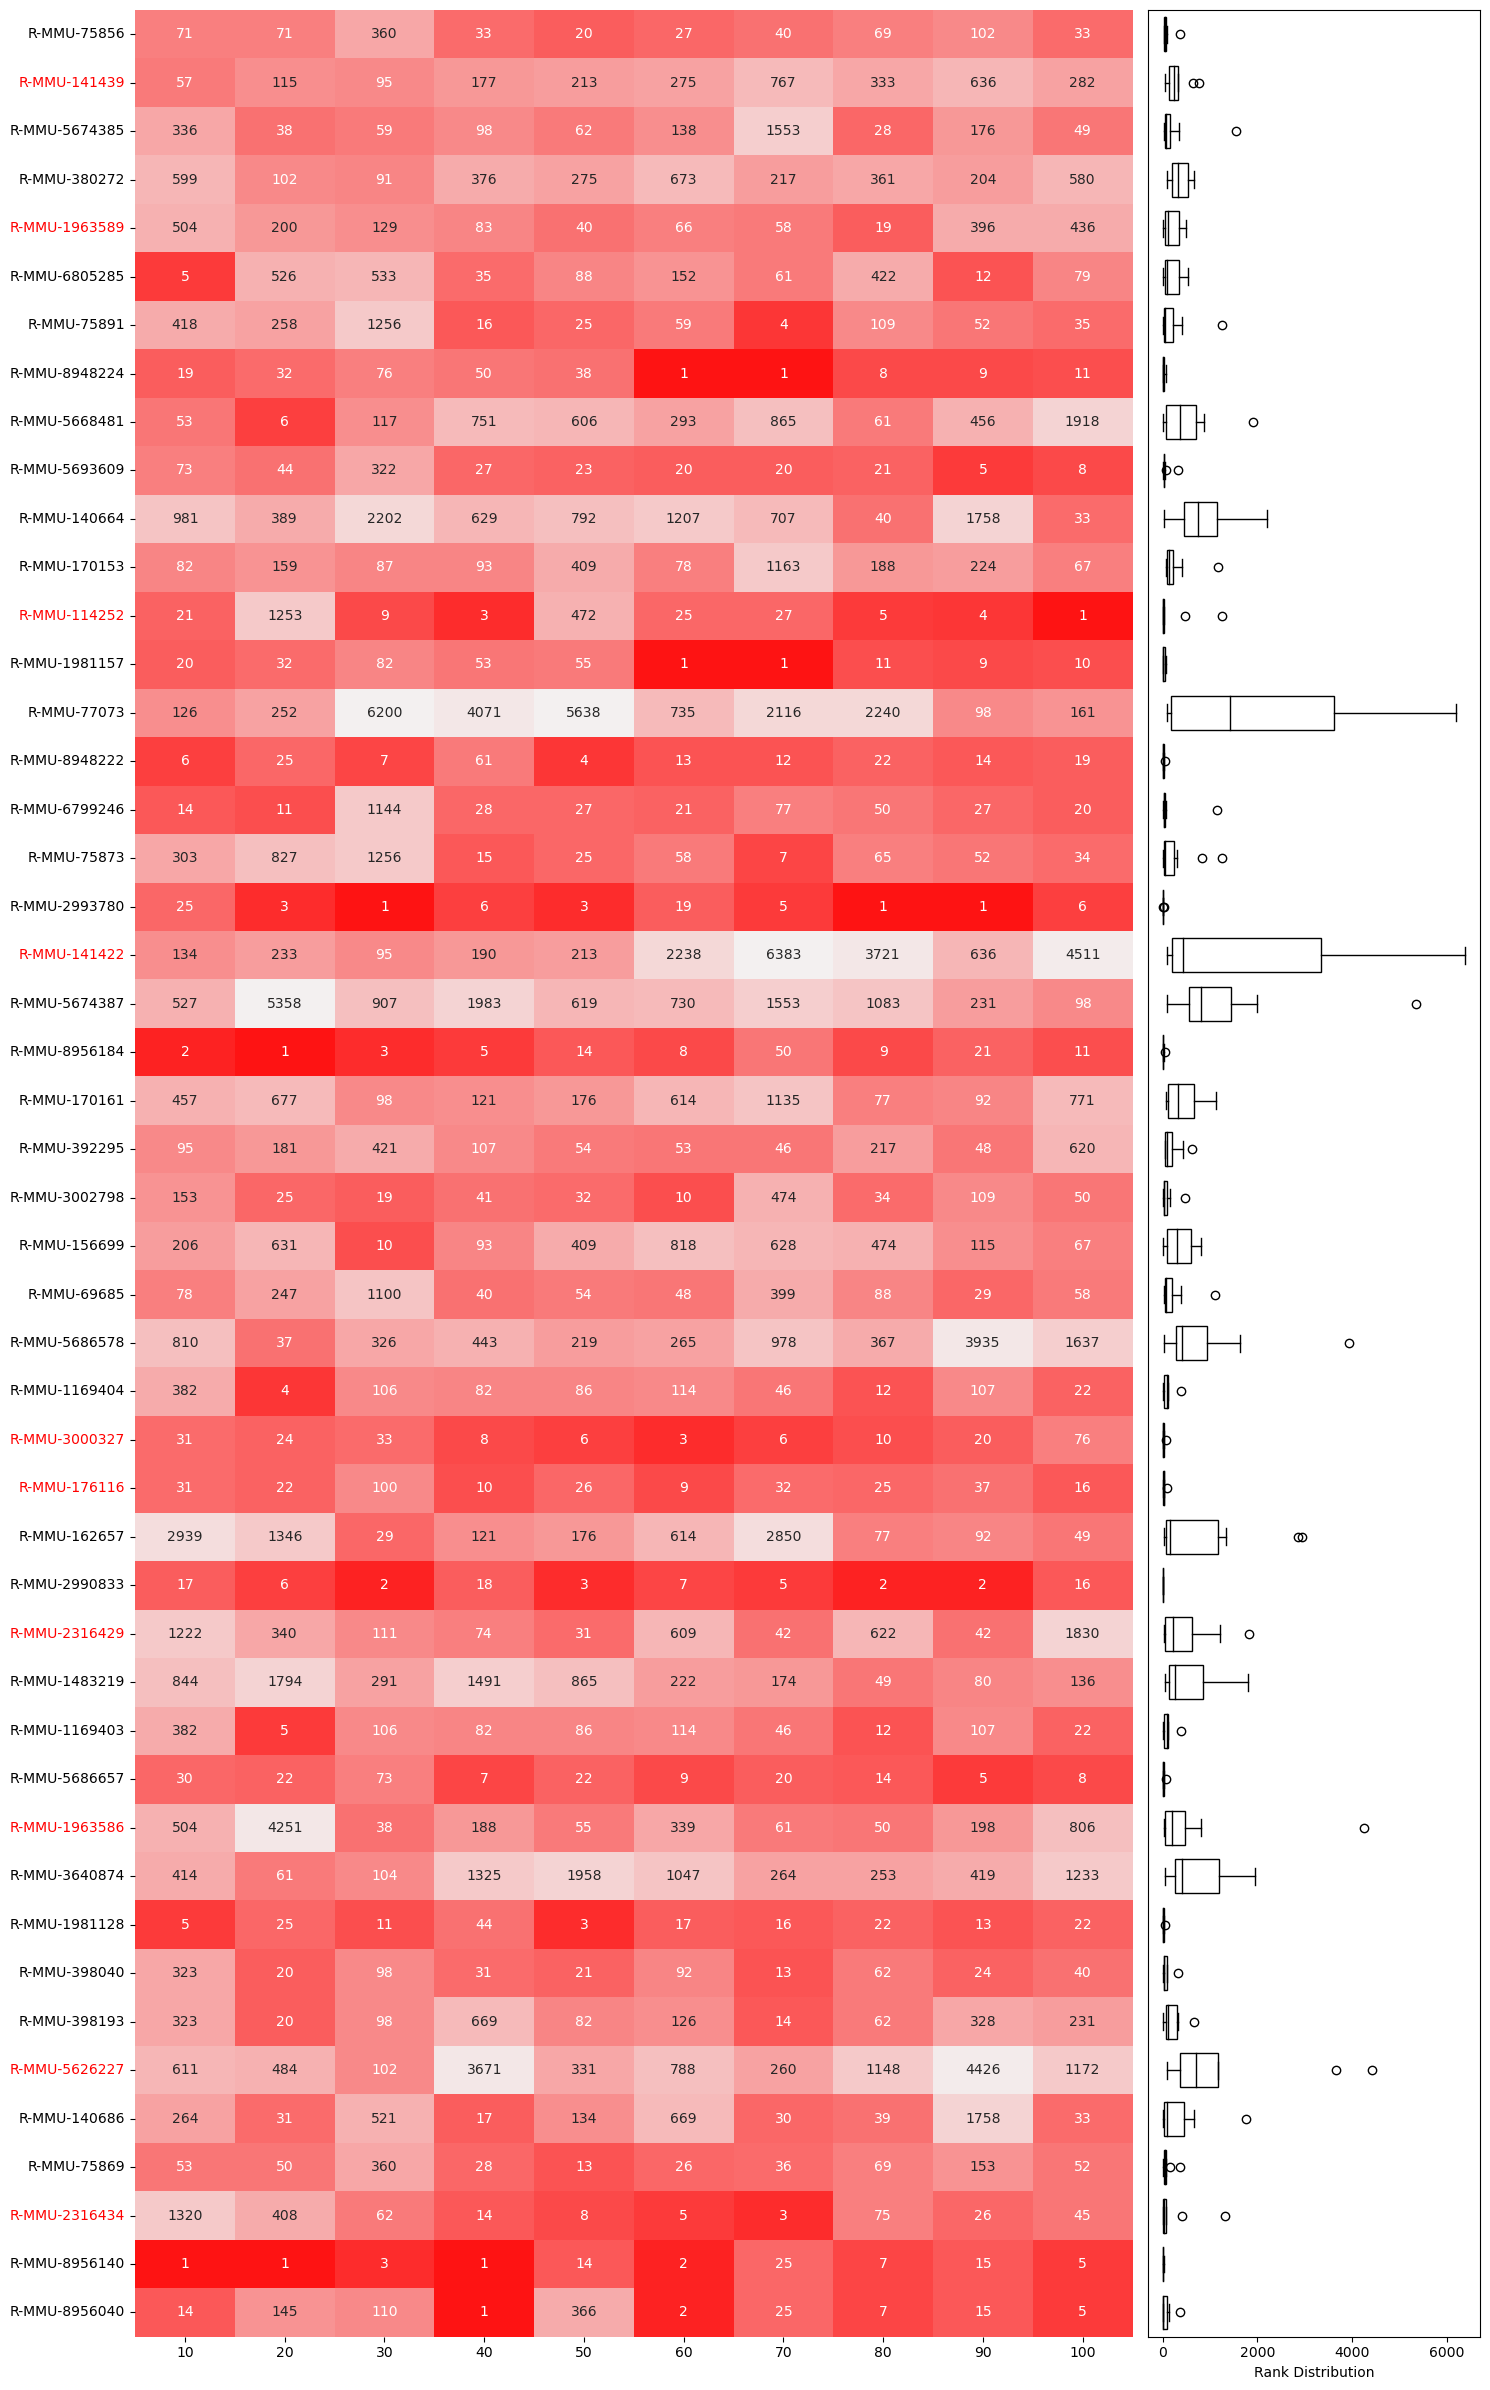


Total unique reactions in top 10 lists: 48

Reactions that appear in all datasets' top 10:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

def get_top_10_reactions(df, centrality_type):
  return df.nlargest(10, centrality_type)[['Node', centrality_type]]

def analyze_reaction_overlap(folder_path, centrality_type, mode):
  datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
             'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
  
  all_data = {
      'graph_10': graph_10,
      'graph_20': graph_20,
      'graph_30': graph_30,
      'graph_40': graph_40,
      'graph_50': graph_50,
      'graph_60': graph_60,
      'graph_70': graph_70,
      'graph_80': graph_80,
      'graph_90': graph_90,
      'graph_100': graph_100,
      'graph_tcga': graph_tcga
  }

  original_top_reactions = set()
  all_top_reactions = {}
  for dataset in datasets:
      file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
      df = pd.read_csv(file_path, sep=",")
      all_top_reactions[dataset] = get_top_10_reactions(df, centrality_type)
      original_top_reactions.update(all_top_reactions[dataset]['Node'].values)
  
  tcga_file_path = f"/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcga/output/graph_tcga_{mode}_{centrality_type}.csv"
  tcga_df = pd.read_csv(tcga_file_path, sep=",")
  all_top_reactions['graph_tcga'] = get_top_10_reactions(tcga_df, centrality_type)
  tcga_top_10 = set(all_top_reactions['graph_tcga']['Node'].values)
  
  unique_reactions = original_top_reactions.union(tcga_top_10)
  
  result_matrix = []
  for reaction in unique_reactions:
      row = []
      for dataset in datasets:
          if reaction in all_top_reactions[dataset]['Node'].values:
              rank = all_top_reactions[dataset][all_top_reactions[dataset]['Node'] == reaction].index[0] + 1
              row.append(rank)
          else:
              original_df = all_data[dataset]
              mask = (original_df['start'] == reaction) | (original_df['end'] == reaction)
              if mask.any():  
                  index = original_df[mask].index[0] + 1
              else:
                  index = -1  
              row.append(index)
      result_matrix.append(row)
  
  result_df = pd.DataFrame(result_matrix, 
                         index=list(unique_reactions), 
                         columns=[d.replace('graph_', '') for d in datasets])
   
  print("\nAnalysis of reactions overlap:")
  print(f"Total unique reactions: {len(unique_reactions)}")
  print(f"Reactions in TCGA top 10: {len(tcga_top_10)}")
  overlapping_reactions = tcga_top_10.intersection(original_top_reactions)
  print(f"Number of overlapping reactions: {len(overlapping_reactions)}") 
  print("\nOverlapping reactions:")
  for reaction in overlapping_reactions:
       print(f"- {reaction}")

  print("\nReactions unique to TCGA top 10:")
  unique_to_tcga = tcga_top_10 - original_top_reactions
  for reaction in unique_to_tcga:
       print(f"- {reaction}")
  
  fig = plt.figure(figsize=(15, len(unique_reactions)*0.5))
  gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
  
  ax_heat = plt.subplot(gs[0])
  result_df_display = result_df.copy()
  result_df_display = result_df_display.where(result_df_display <= 0, lambda x: np.log(x))
  max_val = result_df_display.max().max()
  
  colors = ['#FFFFFF']
  colors.extend(sns.light_palette("red", n_colors=50, as_cmap=False).as_hex()[::-1])
  
  hm = sns.heatmap(result_df_display,
                   cmap=colors,
                   center=None,
                   vmin=-1,
                   vmax=max_val,
                   annot=result_df,
                   fmt='.0f',
                   cbar=False,
                   yticklabels=True,
                   annot_kws={'size': 10},
                   ax=ax_heat)
  
  for tick in ax_heat.yaxis.get_ticklabels():
      if tick.get_text() in tcga_top_10: 
          tick.set_color('red')
  
  ax_box = plt.subplot(gs[1])
  positions = np.arange(len(result_df.index)) + 0.5
  
  for i, (idx, row) in enumerate(result_df.iterrows()):
      valid_values = row[row != -1]
      if not valid_values.empty:
          bp = ax_box.boxplot(valid_values, 
                            positions=[positions[i]], 
                            vert=False,
                            widths=0.7,
                            patch_artist=True,
                            medianprops=dict(color="black"),
                            boxprops=dict(facecolor="white", color="black"),
                            whiskerprops=dict(color="black"),
                            capprops=dict(color="black"))
  
  ax_box.set_ylim(len(result_df.index), 0)
  ax_box.set_yticks([])
  ax_box.set_xlabel('Rank Distribution')
  
  plt.tight_layout()
  plt.show()
  
  print(f"\nTotal unique reactions in top 10 lists: {len(unique_reactions)}")
  print("\nReactions that appear in all datasets' top 10:")
  common_reactions = result_df[(result_df <= 10) & (result_df > 0)].dropna(how='any').index
  for reaction in common_reactions:
      print(f"- {reaction}")

folder_path = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/centrality/'
for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
  for mode in ['Top_1%']:
      analyze_reaction_overlap(folder_path, centrality_type, mode)

In [ ]:
def compare_top_reactions(folder_path, centrality_type, mode):
    datasets = ['graph_10', 'graph_20', 'graph_30', 'graph_40', 'graph_50', 
               'graph_60', 'graph_70', 'graph_80', 'graph_90', 'graph_100']
    
    original_top_reactions = set()
    for dataset in datasets:
        file_path = f"{folder_path}/{dataset}_{mode}_{centrality_type}.csv"
        df = pd.read_csv(file_path, sep=",")
        top_10 = set(df.nlargest(10, centrality_type)['Node'].values)
        original_top_reactions.update(top_10)
    
    tcga_file_path = f"/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcga/output/graph_tcga_{mode}_{centrality_type}.csv"
    tcga_df = pd.read_csv(tcga_file_path, sep=",")
    tcga_top_10 = set(tcga_df.nlargest(10, centrality_type)['Node'].values)
    
    overlapping_reactions = tcga_top_10.intersection(original_top_reactions)
    
    print(f"\nAnalysis for {centrality_type}:")
    print(f"Total unique top 10 reactions in original datasets: {len(original_top_reactions)}")
    print(f"Number of overlapping reactions with TCGA: {len(overlapping_reactions)}")
    print("\nOverlapping reactions:")
    for reaction in overlapping_reactions:
        print(f"- {reaction}")
    
    print("\nReactions unique to TCGA top 10:")
    unique_to_tcga = tcga_top_10 - original_top_reactions
    for reaction in unique_to_tcga:
        print(f"- {reaction}")

for centrality_type in ['Eigenvector', 'Betweenness', 'Closeness']:
    for mode in ['Top_1%']:
        compare_top_reactions(folder_path, centrality_type, mode)


Analysis for Eigenvector:
Total unique top 10 reactions in original datasets: 42
Number of overlapping reactions with TCGA: 4

Overlapping reactions:
- R-MMU-2316429
- R-MMU-3000327
- R-MMU-2993780
- R-MMU-170153

Reactions unique to TCGA top 10:
- R-MMU-141439
- R-MMU-1963586
- R-MMU-5626227
- R-MMU-141422
- R-MMU-114252
- R-MMU-2316434

Analysis for Betweenness:
Total unique top 10 reactions in original datasets: 43
Number of overlapping reactions with TCGA: 3

Overlapping reactions:
- R-MMU-114259
- R-MMU-3000310
- R-MMU-1963589

Reactions unique to TCGA top 10:
- R-MMU-5626228
- R-MMU-170159
- R-MMU-141422
- R-MMU-5626699
- R-MMU-141431
- R-MMU-1250353
- R-MMU-2316434

Analysis for Closeness:
Total unique top 10 reactions in original datasets: 43
Number of overlapping reactions with TCGA: 5

Overlapping reactions:
- R-MMU-3000327
- R-MMU-1963589
- R-MMU-114252
- R-MMU-2316429
- R-MMU-176116

Reactions unique to TCGA top 10:
- R-MMU-141439
- R-MMU-1963586
- R-MMU-5626227
- R-MMU-14

In [45]:
tcga_file_path = f"/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcga/output/graph_tcga_Top_1%_Eigenvector.csv"
tcga_df = pd.read_csv(tcga_file_path, sep=",")
print(tcga_df.head(n=10))

            Node   Eigenvector
0  R-MMU-9627056  7.450581e-09
1   R-MMU-114259  2.011657e-07
2   R-MMU-141422  2.622604e-06
3   R-MMU-141439  2.199411e-05
4   R-MMU-114252  2.622604e-06
5  R-MMU-1981120  7.450581e-09
6  R-MMU-8948231  2.011657e-07
7   R-MMU-983266  7.450581e-09
8   R-MMU-983259  2.011657e-07
9   R-MMU-141431  2.011657e-07
